# <span style="color:Blue">Problem Statement</span>

###### Build a multiple linear regression model for the prediction of demand for shared bikes

# <span style="color:Blue">Business Goal</span>

###### Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### <span style = "color: Magenta"> 1. Data Understanding and exploration</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# suppress warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read the data from csv file

bs_df = pd.read_csv('day.csv')
bs_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
bs_df.shape

(730, 16)

###### <span style="color:'Tomato">The data has 730 rows and 16 columns</span>

In [6]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
null_values_set = bs_df.isnull().sum().sort_values(ascending = False)
null_values_set

cnt           0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dteday        0
instant       0
dtype: int64

###### <span style = "color:Tomato"> There are no null values in data </span>

In [8]:
bs_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [9]:
#see what columns there in data 
bs_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# also see what are data types 
bs_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### <span style = "color: Magenta"> 2. Cleaning Data</span>

### Remove columns which are require for analysis 

##### 1) instant can be dropped as it just row identification 
##### 2) another columns dteday can be dropped as that can be taken care by other columns like  month and year and so on
##### 3) cnt is combination of two other column such as casual and registered, and cnt is traget variable we can drop casual and registered 

In [11]:
remove = ['instant','dteday','casual','registered']
bs_df.drop(remove,axis=1,inplace=True)

In [12]:
bs_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [13]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
#check season column
bs_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
#check weathersit column
bs_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
#check mnth column
bs_df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [17]:
#check weekday column
bs_df.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

###### The columns such as season, weathersit , month and weekday can be catagorised .


In [18]:
# Bucketing the season feature

bs_df.season = bs_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})



In [19]:
# now check the dataset

bs_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        1           1           2  14.110847   
1  spring   0     1        0        2           1           2  14.902598   
2  spring   0     1        0        3           1           1   8.050924   
3  spring   0     1        0        4           1           1   8.200000   
4  spring   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [20]:
# Bucketing the weathersit feature

bs_df.weathersit = bs_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
bs_df.head()

season  yr  mnth  holiday  weekday  workingday weathersit       temp  \
0  spring   0     1        0        1           1      Misty  14.110847   
1  spring   0     1        0        2           1      Misty  14.902598   
2  spring   0     1        0        3           1      Clear   8.050924   
3  spring   0     1        0        4           1      Clear   8.200000   
4  spring   0     1        0        5           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [21]:
# Bucketing the month feature

bs_df.mnth = bs_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

bs_df.head()

season  yr mnth  holiday  weekday  workingday weathersit       temp  \
0  spring   0  jan        0        1           1      Misty  14.110847   
1  spring   0  jan        0        2           1      Misty  14.902598   
2  spring   0  jan        0        3           1      Clear   8.050924   
3  spring   0  jan        0        4           1      Clear   8.200000   
4  spring   0  jan        0        5           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [22]:
# Bucketing the weekday feature

bs_df.weekday = bs_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bs_df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1      Misty  14.110847   
1  spring   0  jan        0     tue           1      Misty  14.902598   
2  spring   0  jan        0     wed           1      Clear   8.050924   
3  spring   0  jan        0     thu           1      Clear   8.200000   
4  spring   0  jan        0     fri           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [23]:
bs_df.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.462641    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt  
count  730.000000   730.000000  
mean    12.763620  4508.006849  
std      5.195841  1936.011647  
min      1.500244    22.000000  
25%      9.041650  3169.750000  
50%     12.125325  4548.500000  
75%     15.625589  5966.000000  
max     34.000021  8714.000000

In [24]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [25]:
null_values_set = bs_df.isnull().sum().sort_values(ascending = False)
null_values_set

cnt           0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dtype: int64

In [26]:
#checking the any correlation 
bs_df.corr()

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -0.011852 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        0.048789 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.010657  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764   -0.027640  0.627044  0.630685 -0.098543   

            windspeed       cnt  
yr          -0.011624  0.569728  
holiday      0.006257 -0.068764  
workingday  -0.002453 -0.027640  
temp        -0.158186  0.627044  
atemp       -0.183876  0.630685  
hum         -0.248506 -0.098543  
windspeed    1.000000 -0.235132  
cnt         -0.235132  1.000000

### <span style = "color: Magenta"> 3. Data Visualization</span>

##### Checking Outliers

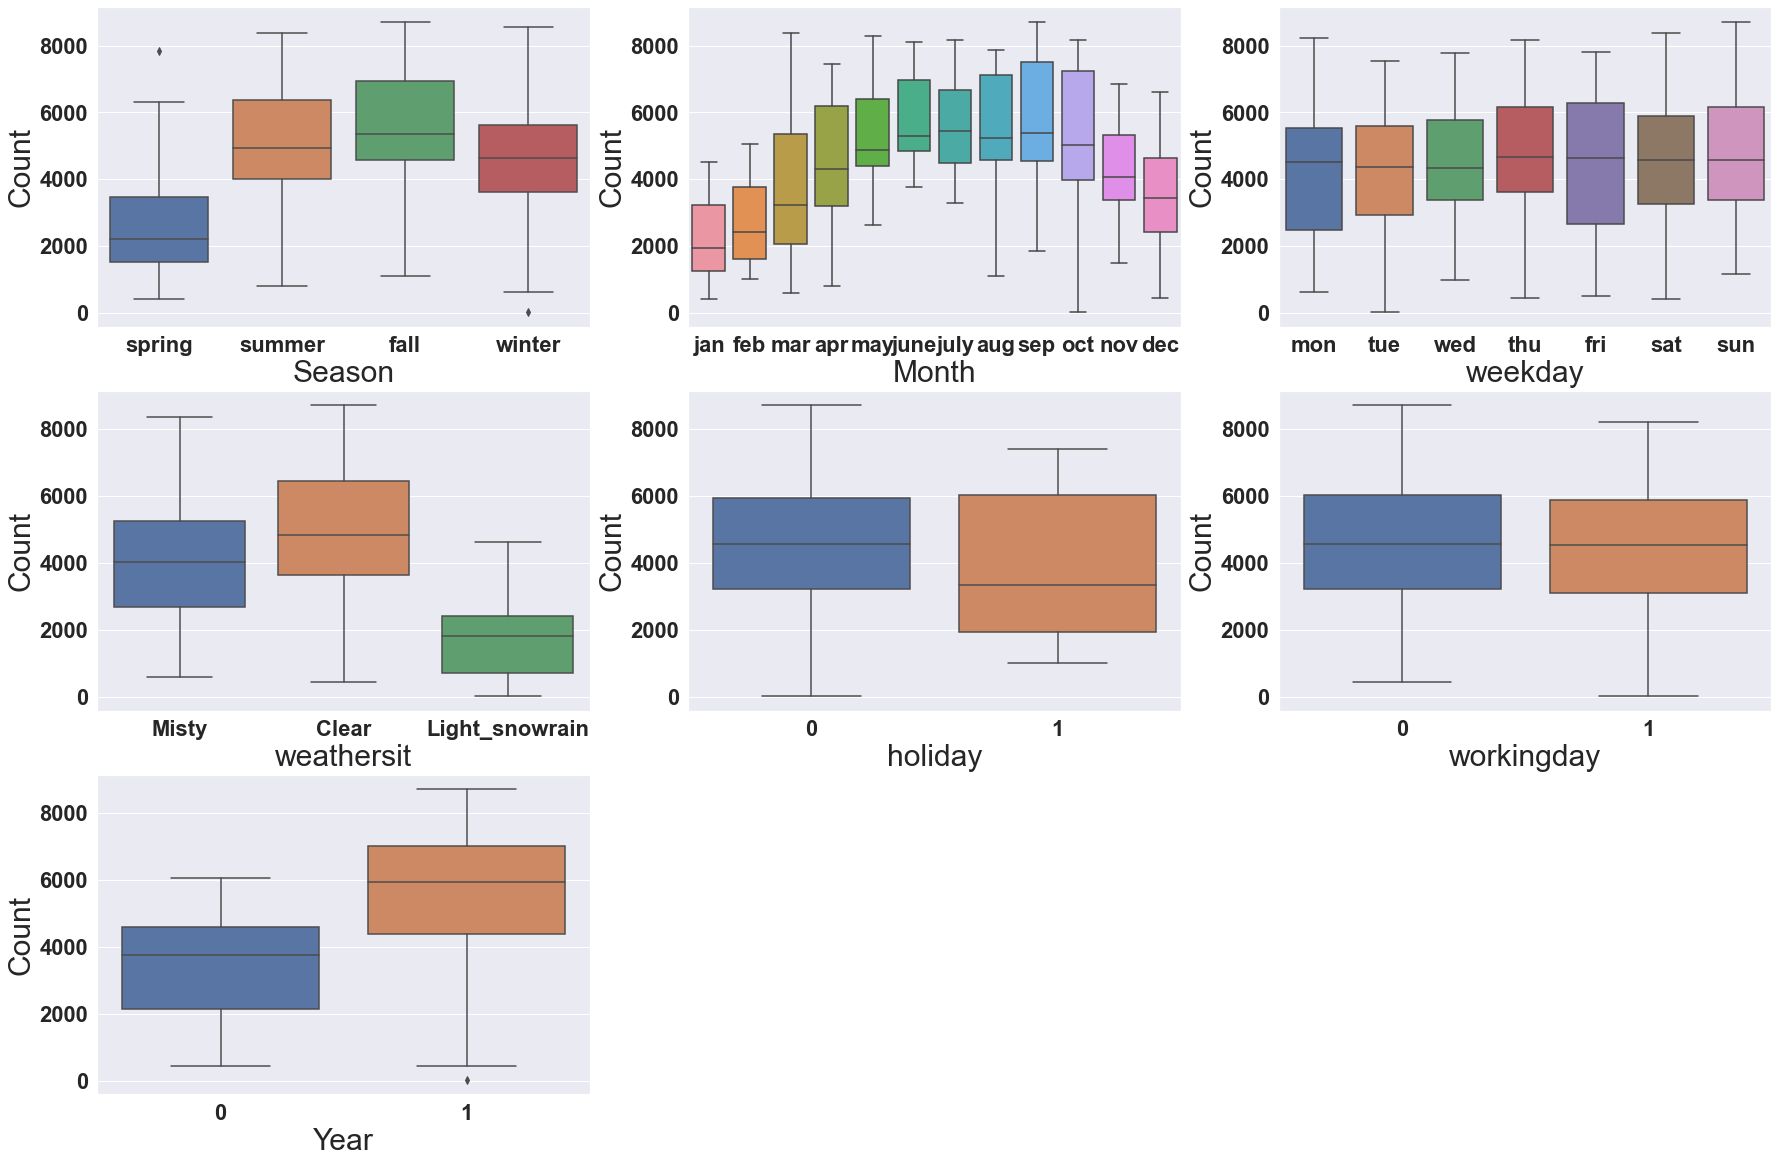

In [27]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)

plt.subplot(3,3,1)
ax = sns.boxplot(x = 'season', y = 'cnt', data = bs_df)
ax.set_xlabel("Season",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,2)
ax = sns.boxplot(x = 'mnth', y = 'cnt', data = bs_df)
ax.set_xlabel("Month",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,3)
ax = sns.boxplot(x = 'weekday', y = 'cnt', data = bs_df)
ax.set_xlabel("weekday",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,4)
ax = sns.boxplot(x = 'weathersit', y = 'cnt', data = bs_df)
ax.set_xlabel("weathersit",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,5)
ax = sns.boxplot(x = 'holiday', y = 'cnt', data = bs_df)
ax.set_xlabel("holiday",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,6)
ax = sns.boxplot(x = 'workingday', y = 'cnt', data = bs_df)
ax.set_xlabel("workingday",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(3,3,7)
ax = sns.boxplot(x = 'yr', y = 'cnt', data = bs_df)
ax.set_xlabel("Year",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.show()

###### From above plots it can be obsreved that there are no outliers to handle

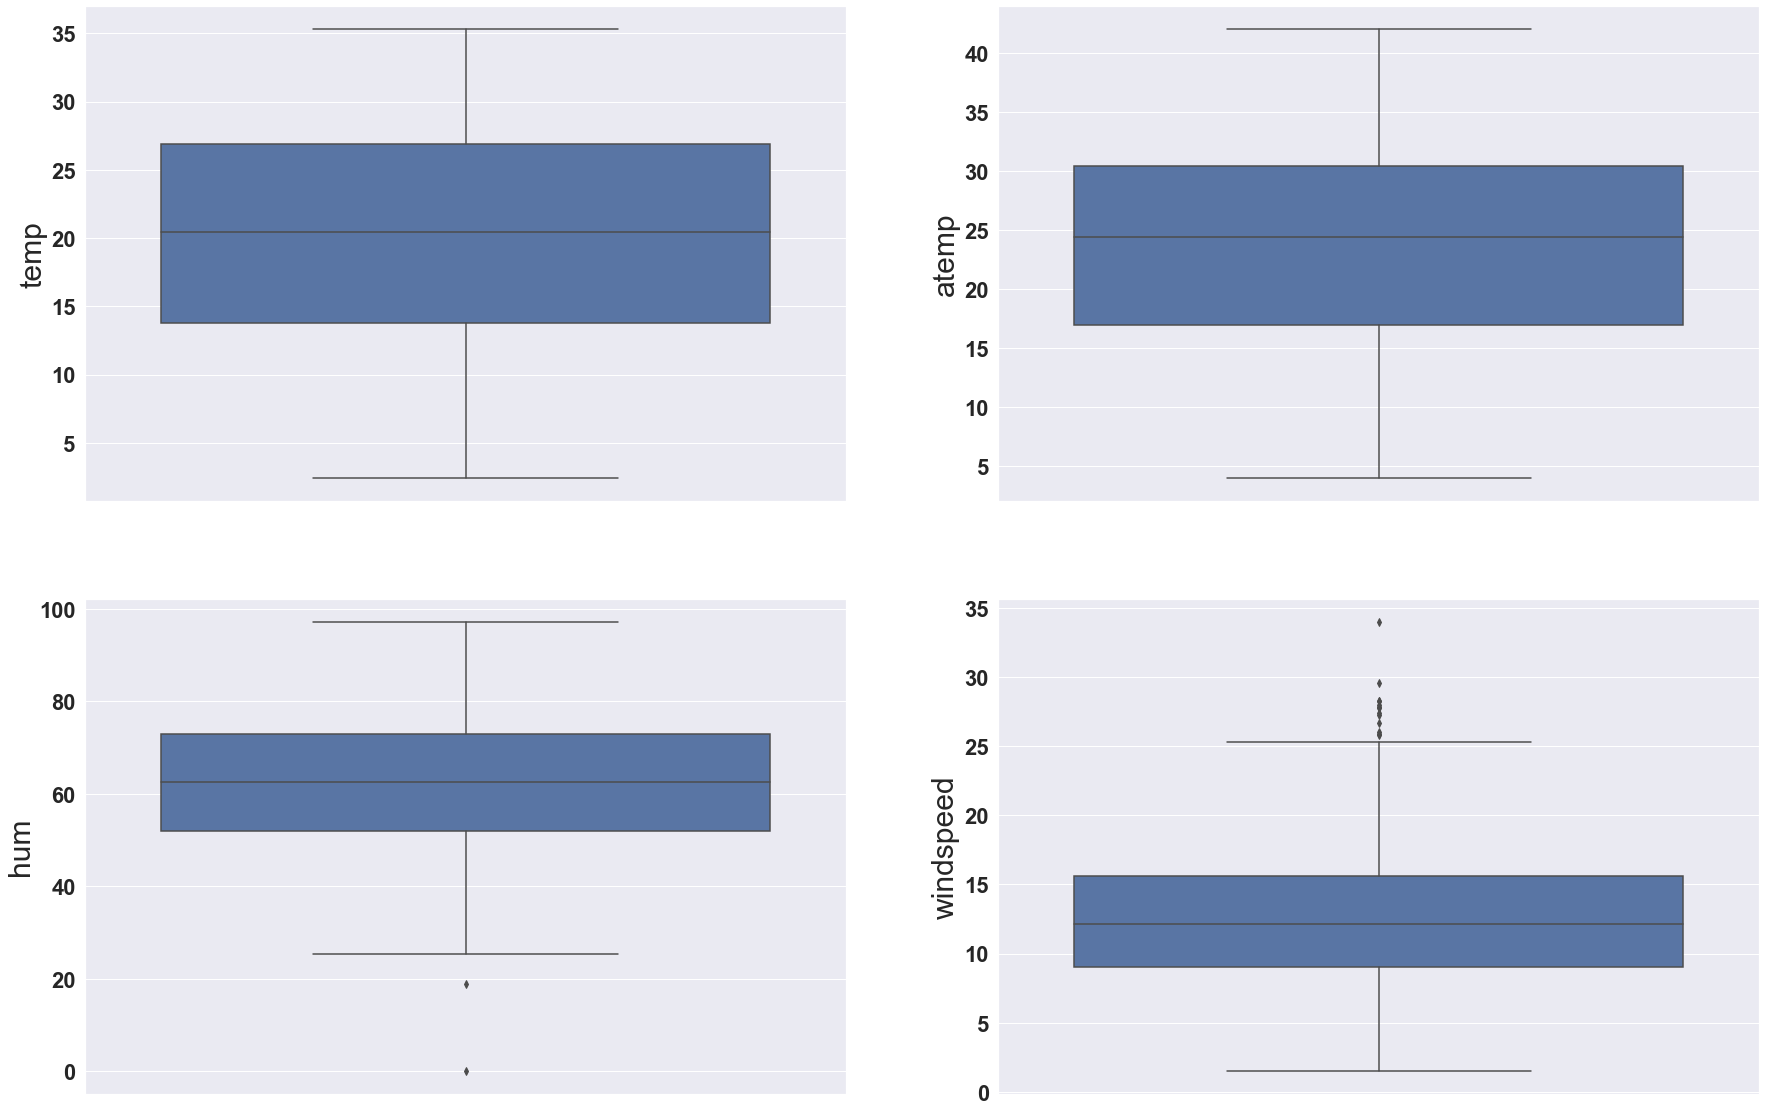

In [28]:
rem_col = ['temp', 'atemp', 'hum', 'windspeed']
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)

plt.subplot(2,2,1)
ax = sns.boxplot(y='temp', data=bs_df)
ax.set_ylabel("temp", fontsize = 30)
plt.subplot(2,2,2)
ax = sns.boxplot(y='atemp', data=bs_df)
ax.set_ylabel("atemp", fontsize = 30)
plt.subplot(2,2,3)
ax = sns.boxplot(y='hum', data=bs_df)
ax.set_ylabel("hum", fontsize = 30)
plt.subplot(2,2,4)
ax = sns.boxplot(y='windspeed', data=bs_df)
ax.set_ylabel("windspeed", fontsize = 30)
plt.show()

##### Plotting barplots for categorical columns

In [29]:
# bucketing the year column

bs_df.yr = bs_df.yr.map({0:2018, 1:2019})

Text(0, 0.5, 'Count')

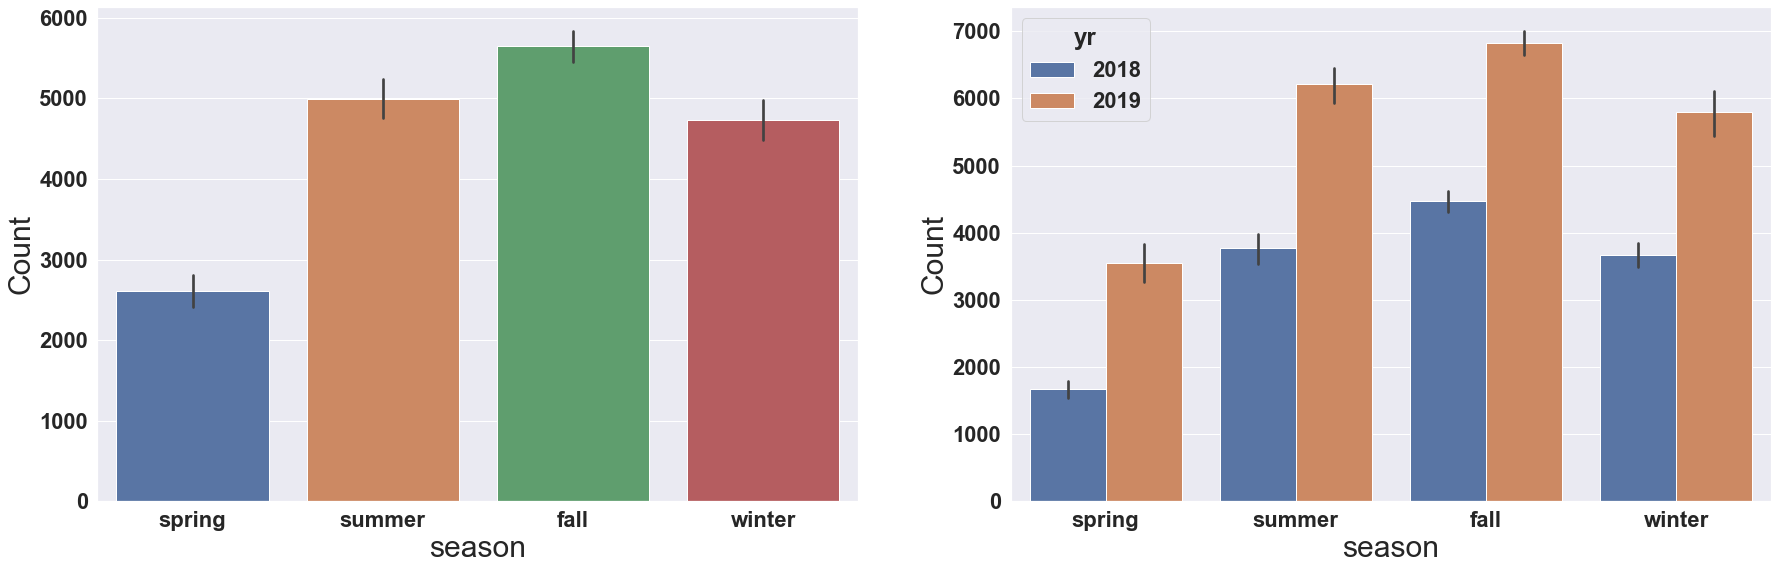

In [30]:
# visualizing for season column
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)

plt.subplot(2,2,1)
ax = sns.barplot('season','cnt',data=bs_df)
ax.set_xlabel("season",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(2,2,2)
ax = sns.barplot('season','cnt',data=bs_df,hue='yr')
ax.set_xlabel("season",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)

#### Out of all seasons Fall attarct more booking. Moreover booking has increase from 2018 to 2019.

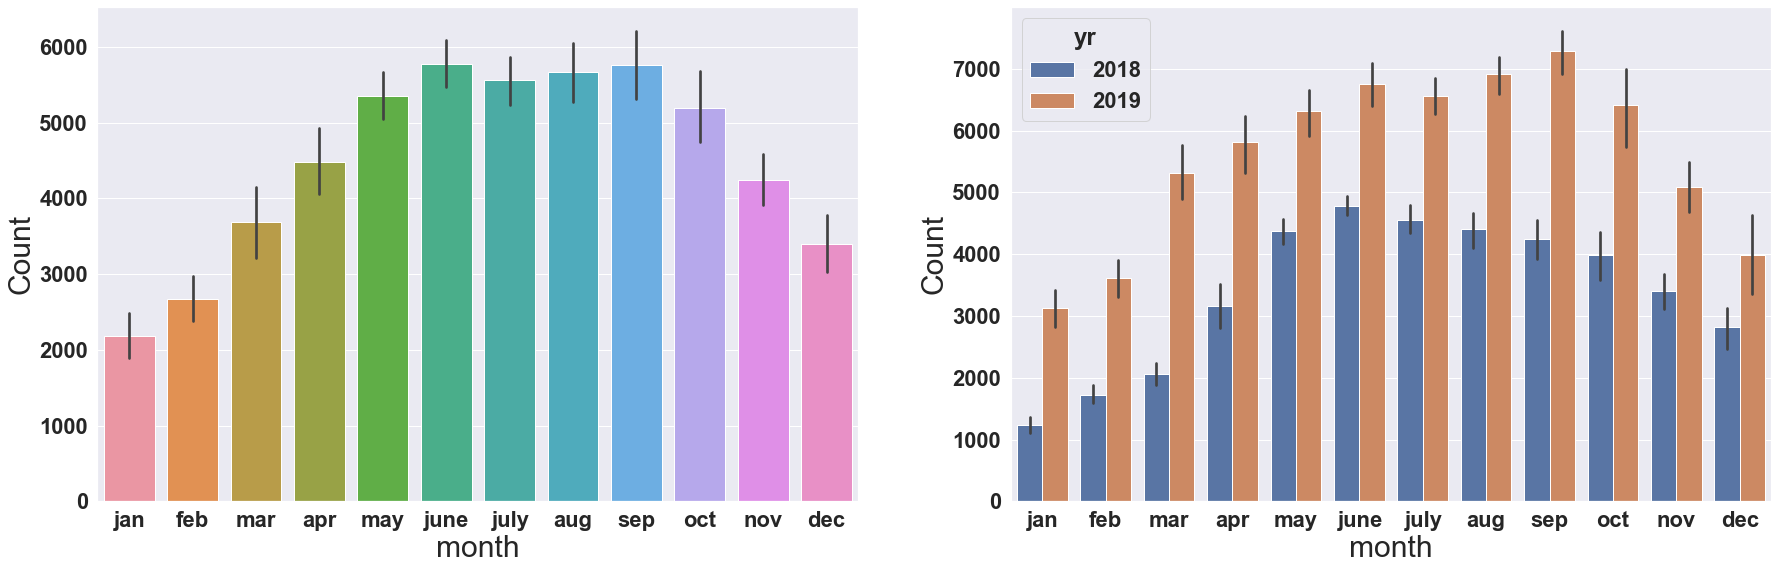

In [31]:
# visualizing for month column

from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)

plt.subplot(2,2,1)
ax = sns.barplot('mnth','cnt',data=bs_df)
ax.set_xlabel("month",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(2,2,2)
ax = sns.barplot('mnth','cnt',data=bs_df,hue='yr')
ax.set_xlabel("month",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.show()

##### May to October sees more booking and same trend persist from 2018 to 2019.

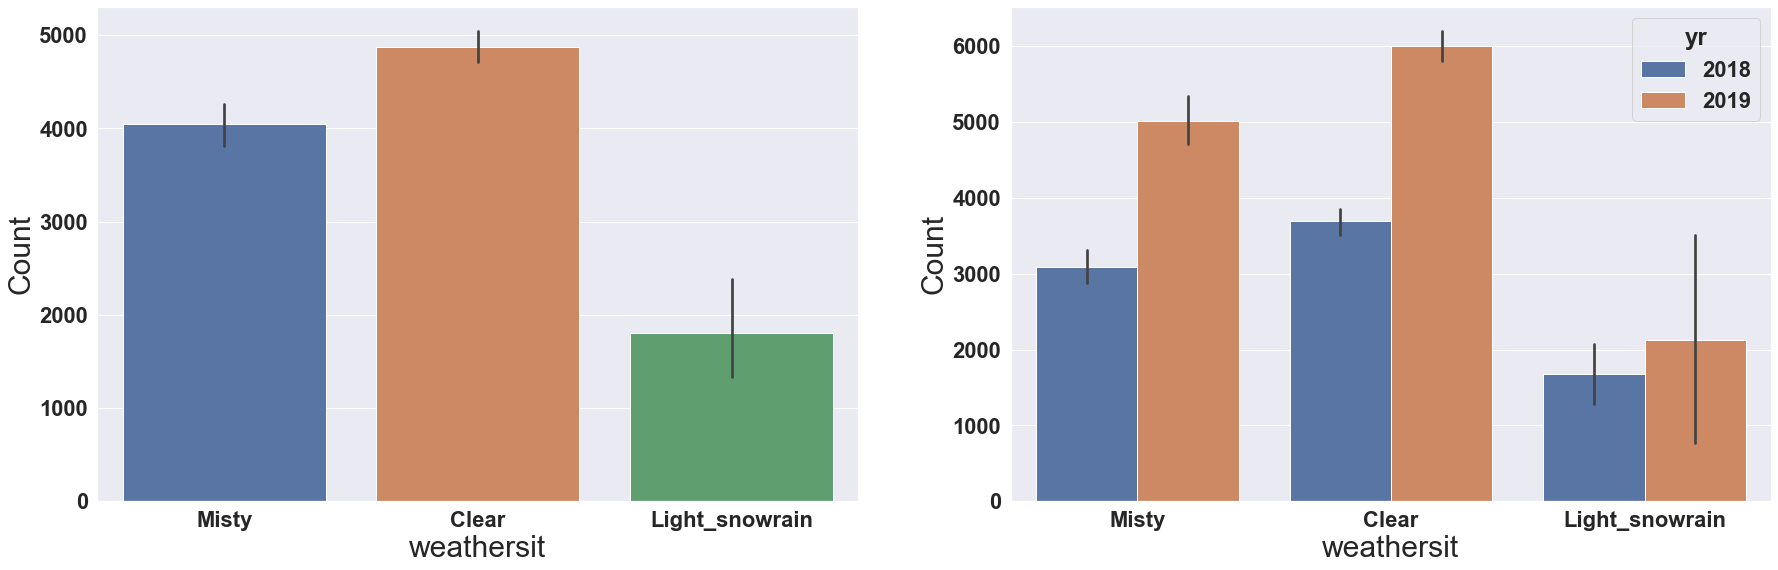

In [32]:
# visualizing for weathersit column


from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)

plt.subplot(2,2,1)
ax = sns.barplot('weathersit','cnt',data=bs_df)
ax.set_xlabel("weathersit",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(2,2,2)
ax = sns.barplot('weathersit','cnt',data=bs_df,hue='yr')
ax.set_xlabel("weathersit",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.show()

##### Clear weather sees more booking and again booking is more in 2019 comapred to previous year, i.e 2018

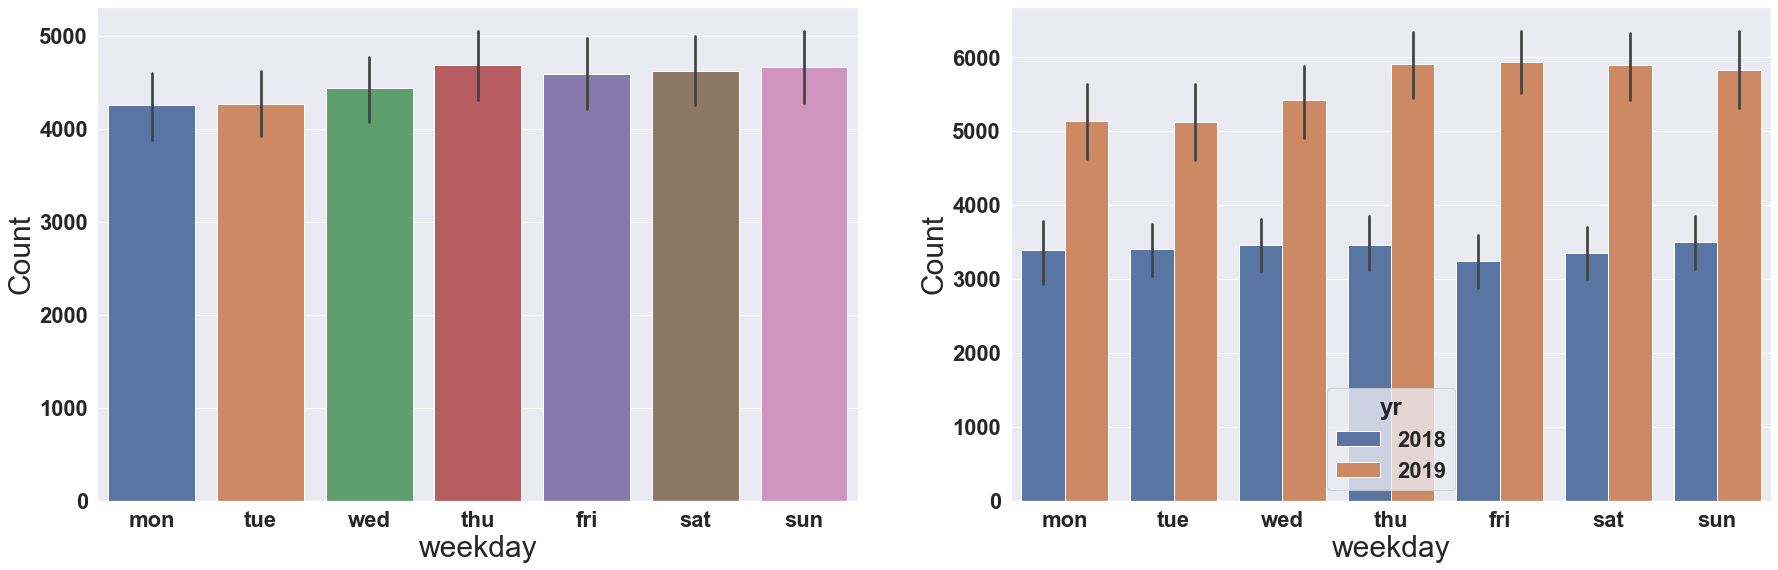

In [33]:
# visualizing for weekday column


from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)

plt.subplot(2,2,1)
ax = sns.barplot('weekday','cnt',data=bs_df)
ax.set_xlabel("weekday",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(2,2,2)
ax = sns.barplot('weekday','cnt',data=bs_df,hue='yr')
ax.set_xlabel("weekday",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.show()

##### Weekday like Thu, Fir and weekend have more number of bookings as compared to the first three days of week.

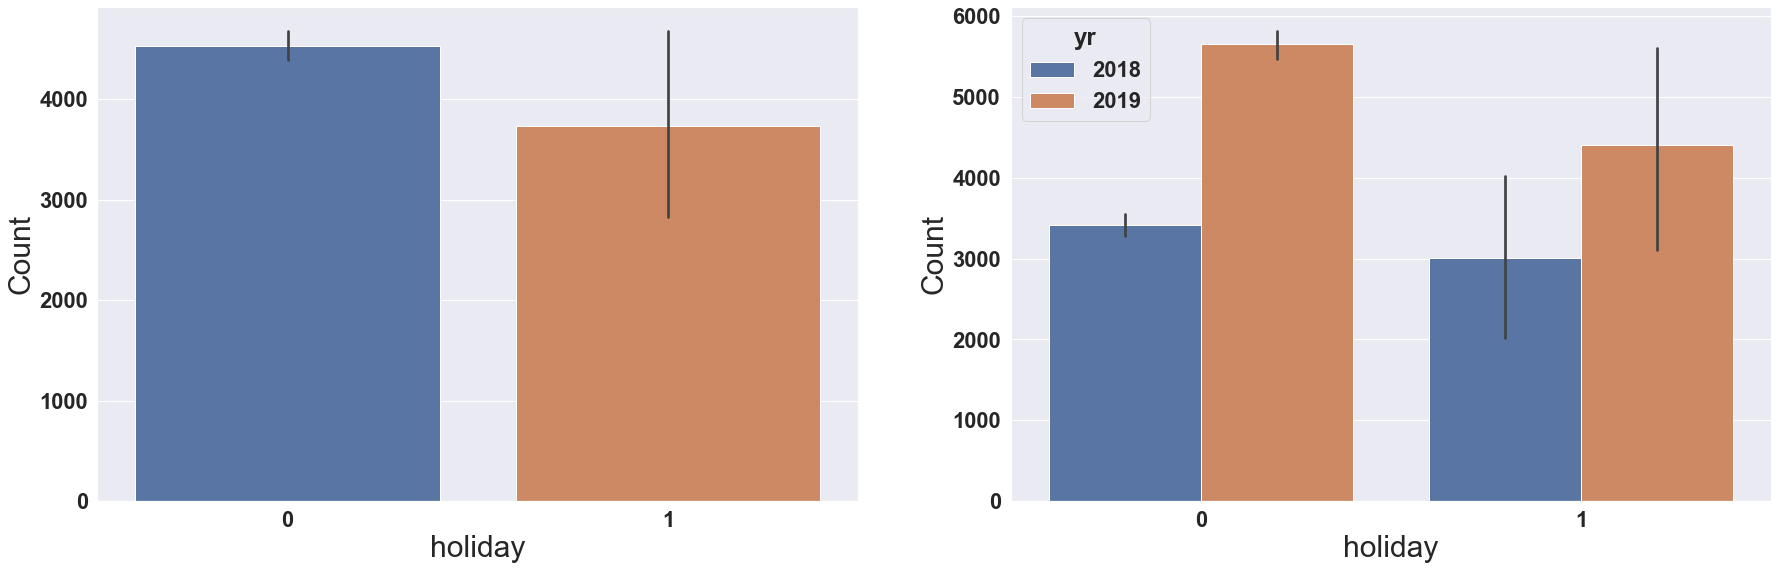

In [34]:
# visualizing for holiday column

from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)

plt.subplot(2,2,1)
ax = sns.barplot('holiday','cnt',data=bs_df)
ax.set_xlabel("holiday",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(2,2,2)
ax = sns.barplot('holiday','cnt',data=bs_df,hue='yr')
ax.set_xlabel("holiday",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.show()

##### on holiday there is less booking 

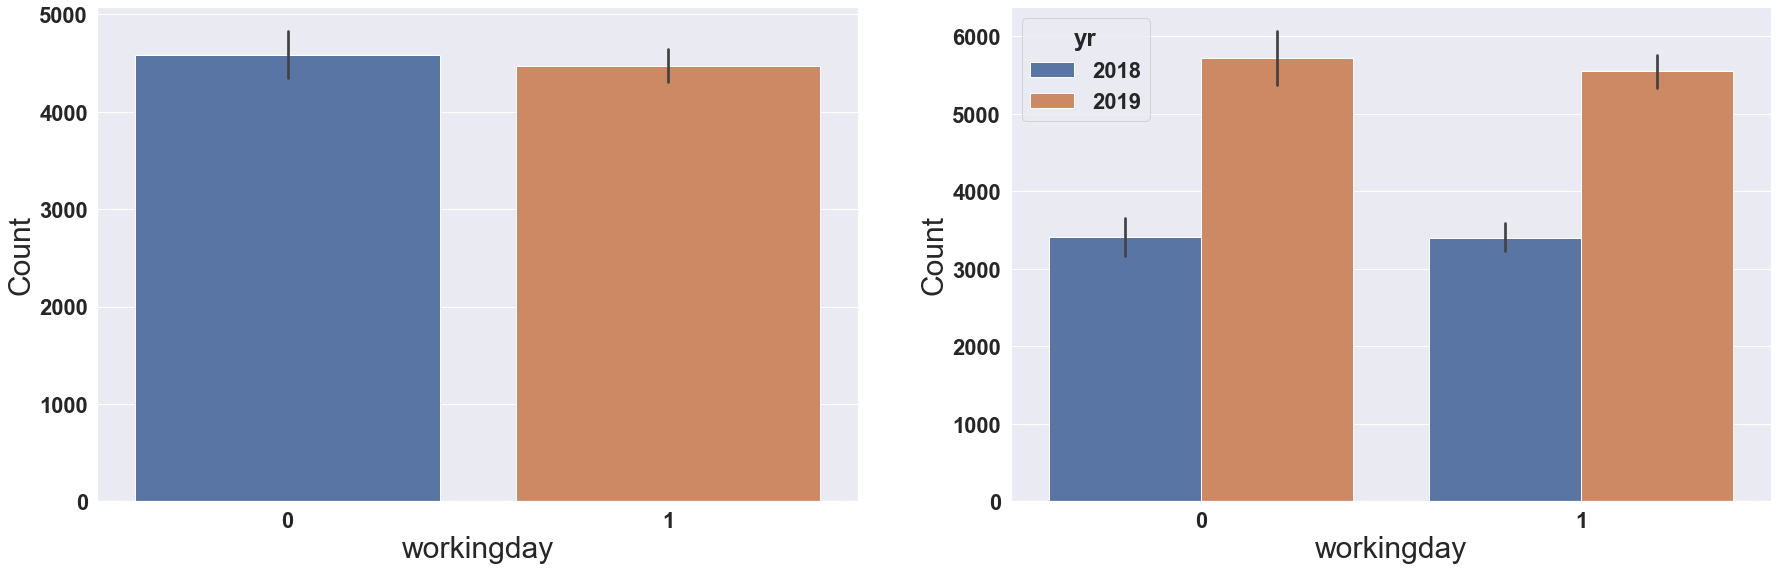

In [35]:
# visualizing for workingday column
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)

plt.subplot(2,2,1)
ax = sns.barplot('workingday','cnt',data=bs_df)
ax.set_xlabel("workingday",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(2,2,2)
ax = sns.barplot('workingday','cnt',data=bs_df,hue='yr')
ax.set_xlabel("workingday",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.show()

##### Booking on either working or no working is same but number of bookings increases from 2018 to 2019.

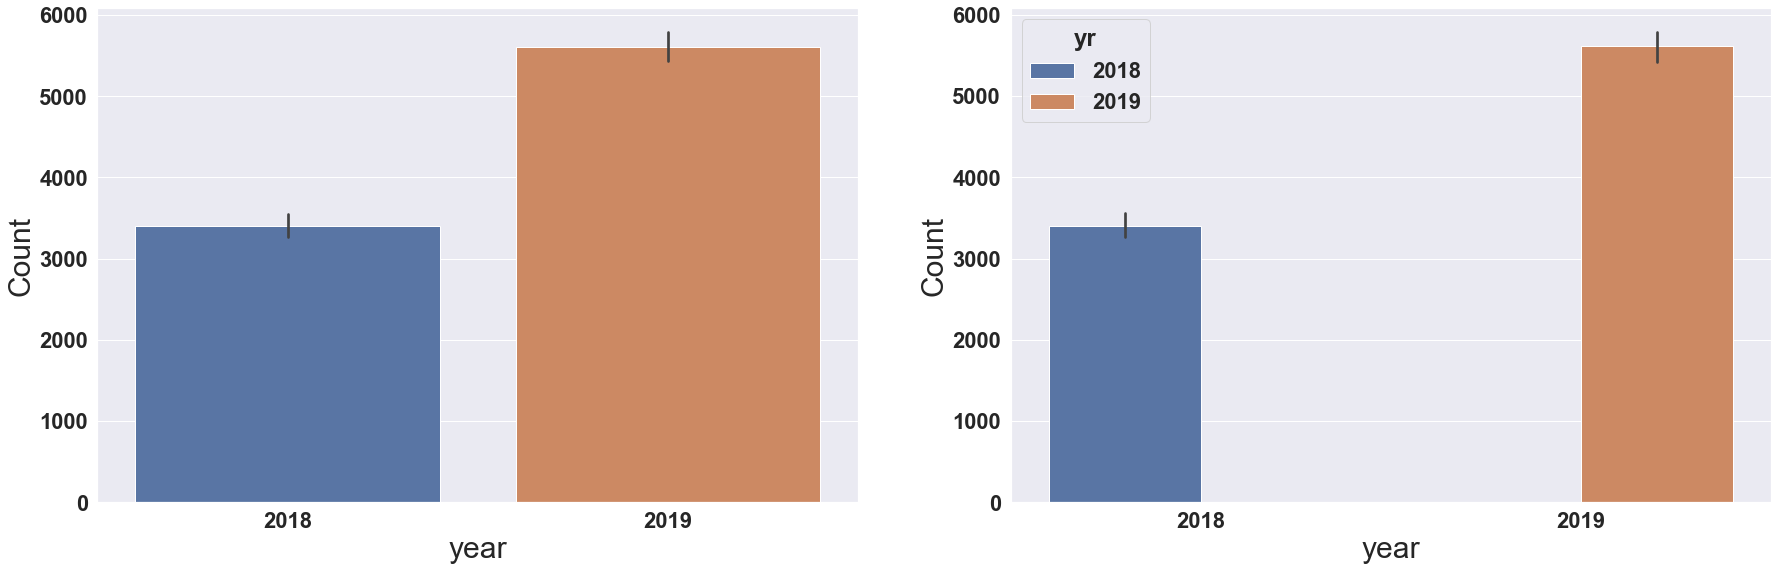

In [36]:
# visualizing for year column


from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)

plt.subplot(2,2,1)
ax = sns.barplot('yr','cnt',data=bs_df)
ax.set_xlabel("year",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.subplot(2,2,2)
ax = sns.barplot('yr','cnt',data=bs_df,hue='yr')
ax.set_xlabel("year",fontsize = 30)
ax.set_ylabel("Count", fontsize = 30)
plt.show()

##### 2019 shows more booking coampred to the previous year.

### Check relationship between different columns

<Figure size 1080x2160 with 0 Axes>

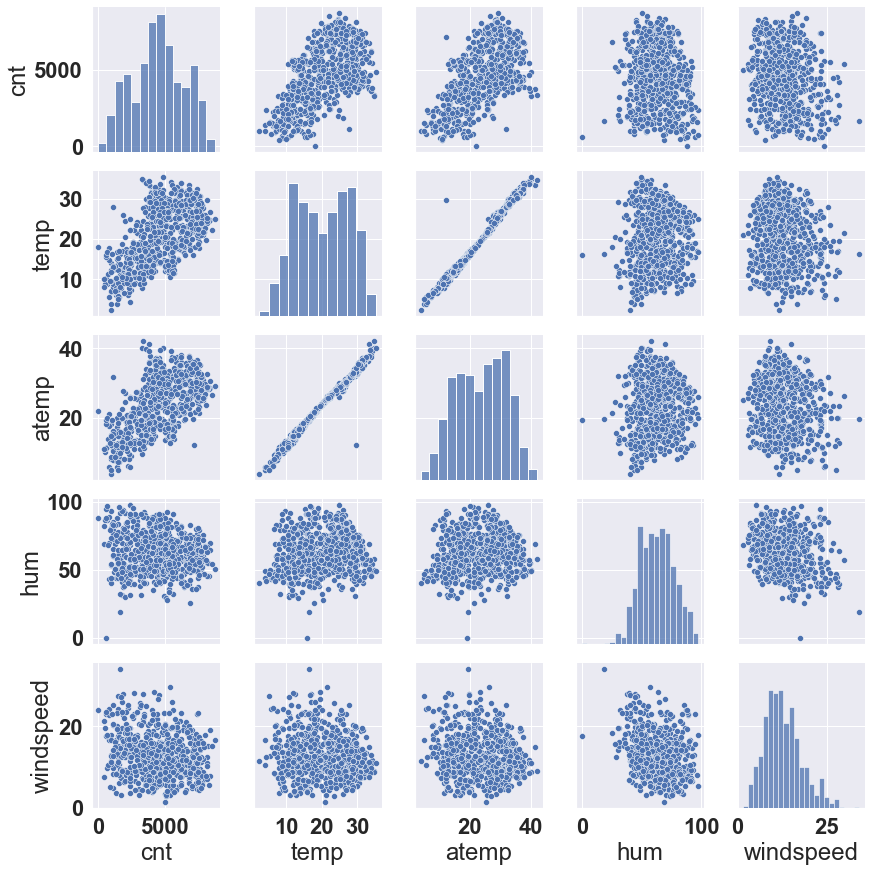

In [37]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bs_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### The temp and atemp has the some good  corelation with the target variable count

<Figure size 2160x1440 with 0 Axes>

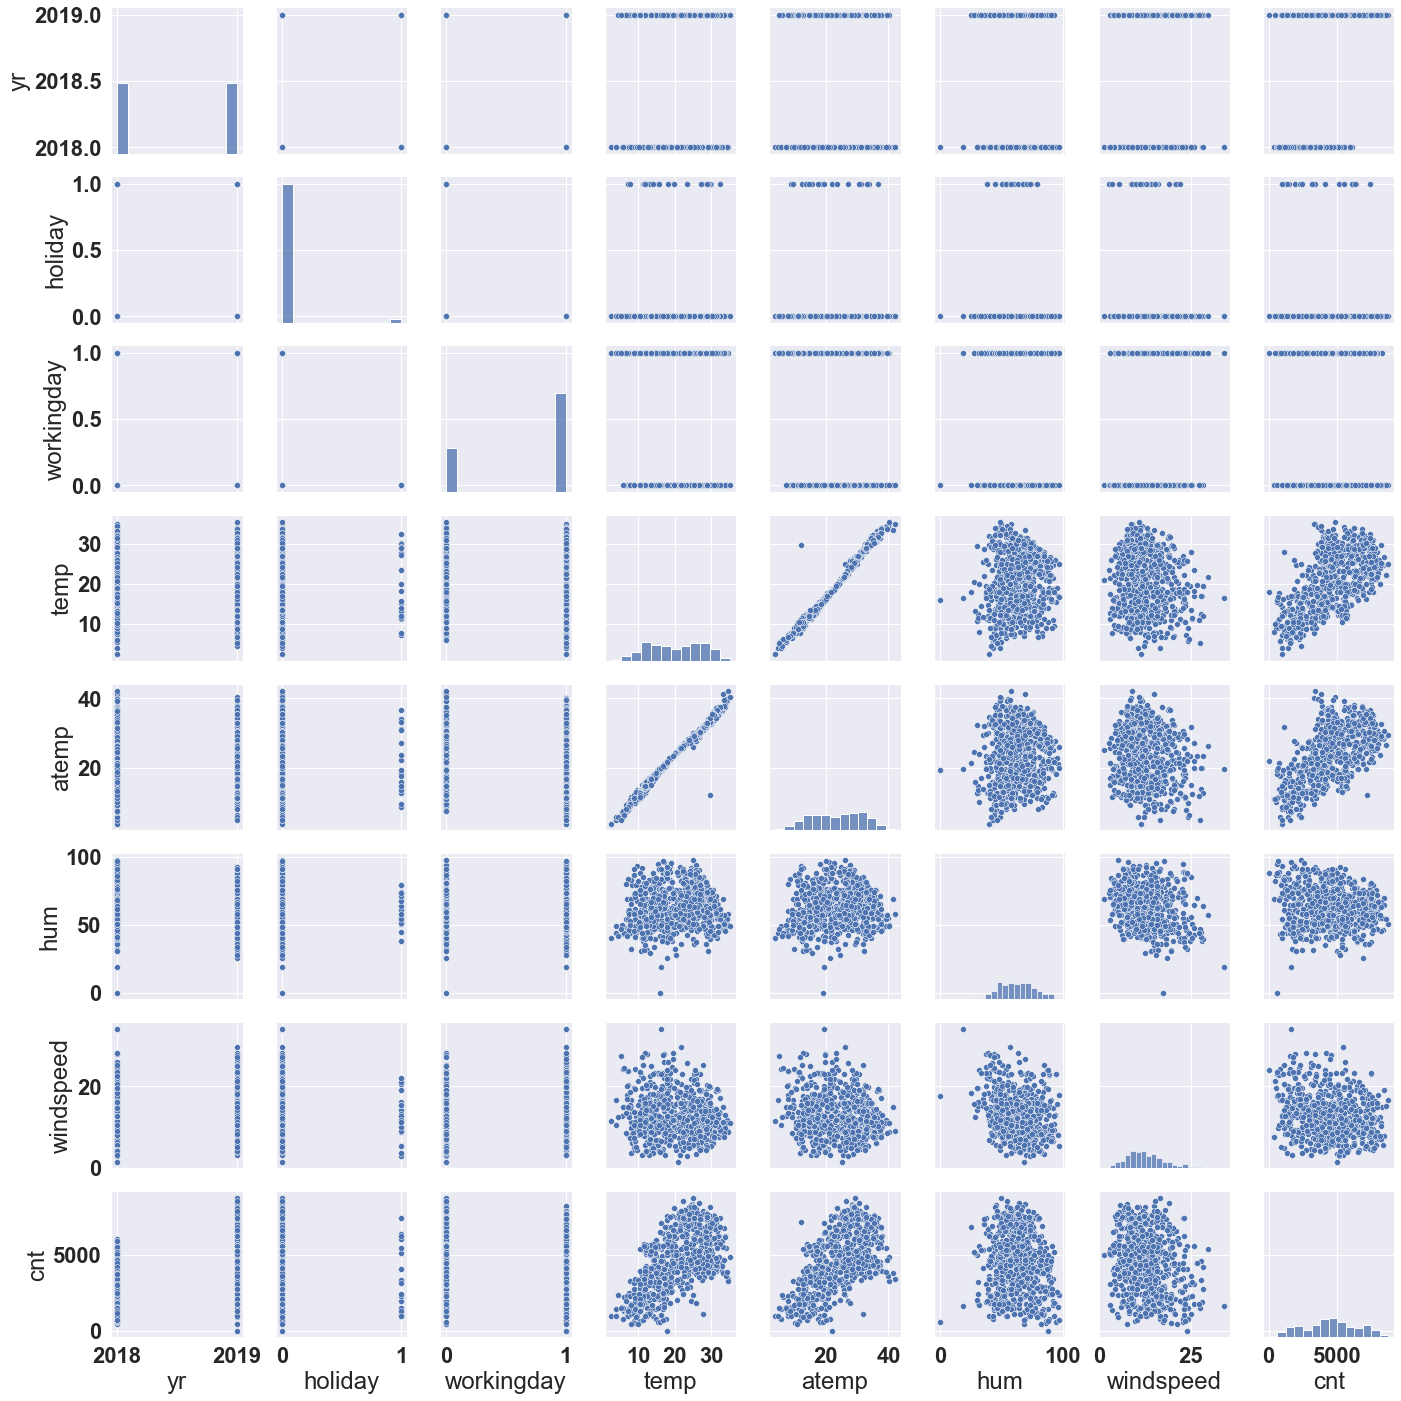

In [38]:
plt.figure(figsize=(30,20))
sns.pairplot(bs_df)
plt.show()

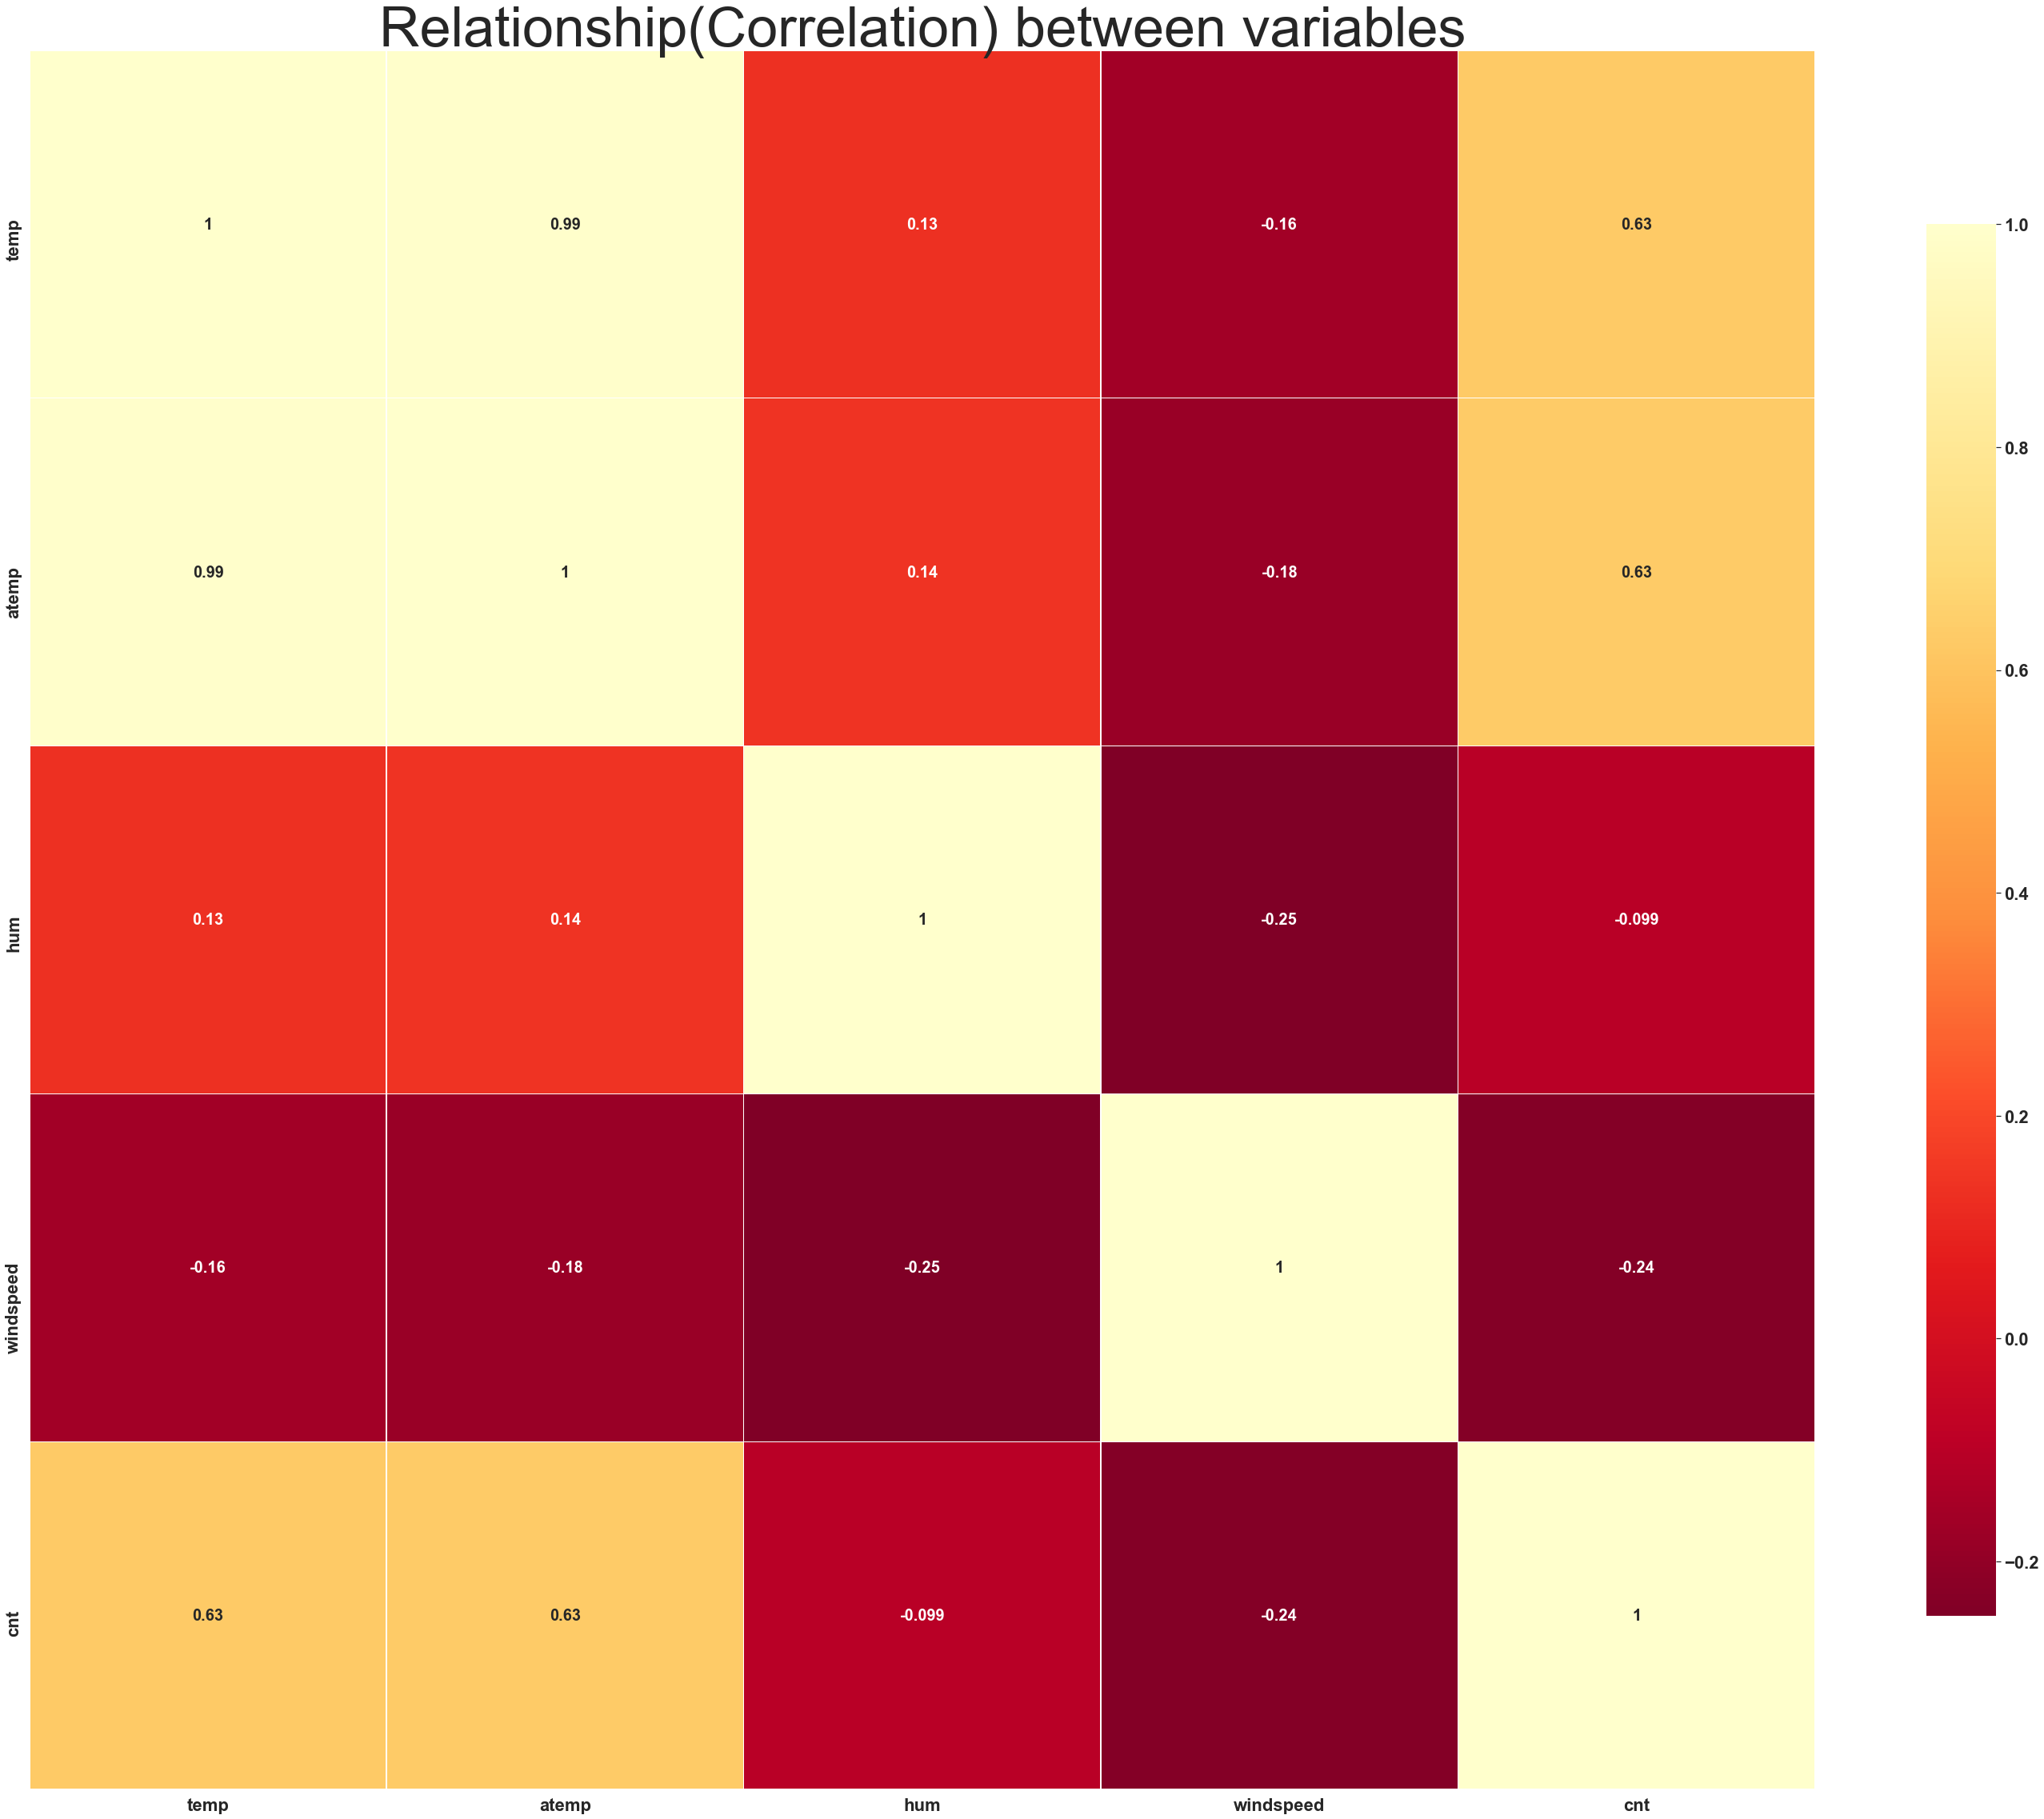

In [39]:
# See the correlation of  numerical variable with each other
f, ax = plt.subplots(figsize=(50,40))
sns.set(font_scale = 2)
sns.heatmap(bs_df[['temp','atemp','hum','windspeed','cnt']].corr(), linewidths=0.5, cmap="YlOrRd_r",cbar_kws={"shrink": .8},annot=True,annot_kws={"fontsize":20})
sns.set(font_scale=1.5) 
plt.title('Relationship(Correlation) between variables', fontsize = 70)
plt.show()

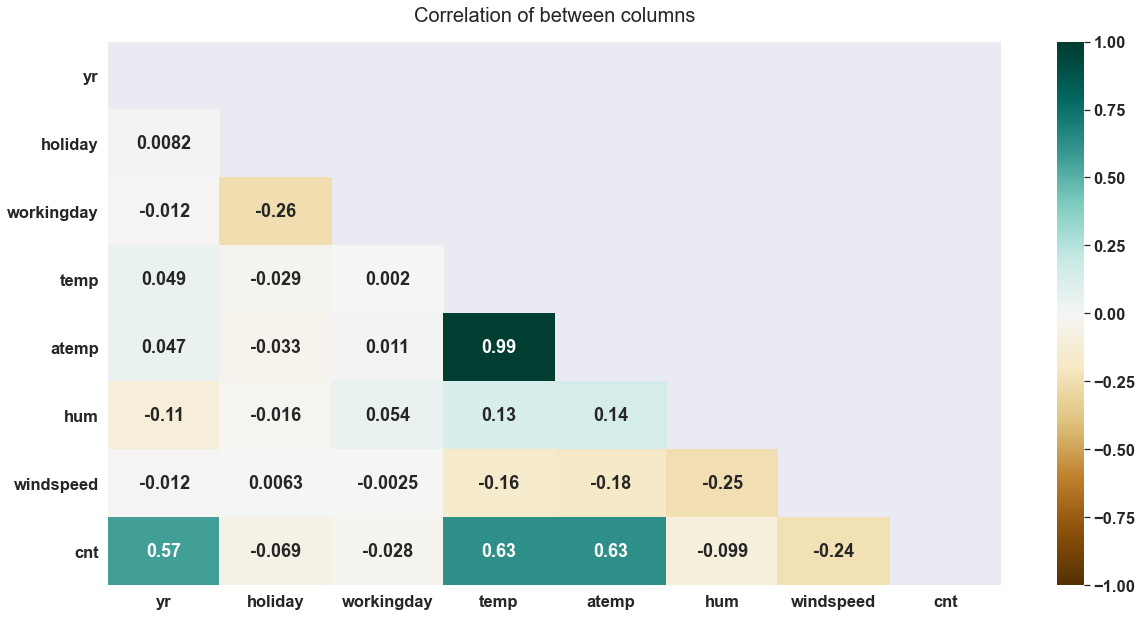

In [40]:
plt.figure(figsize=(20, 10))
# Using the mask to just show the lower traingular matrix
mask = np.triu(np.ones_like(bs_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(bs_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation of between columns', fontdict={'fontsize':20}, pad=20);

### Remarks

##### the data shows that Target variable is related with other variables hence lets explore regression model
##### temp and atemp has strong correlation and hence it looks like atemp derived from temp so atemp field can be removed
##### Moreover otehr features like days_old, map has good correlation that can be seelcted by using Variance Inflation Factor

<Figure size 2160x1440 with 0 Axes>

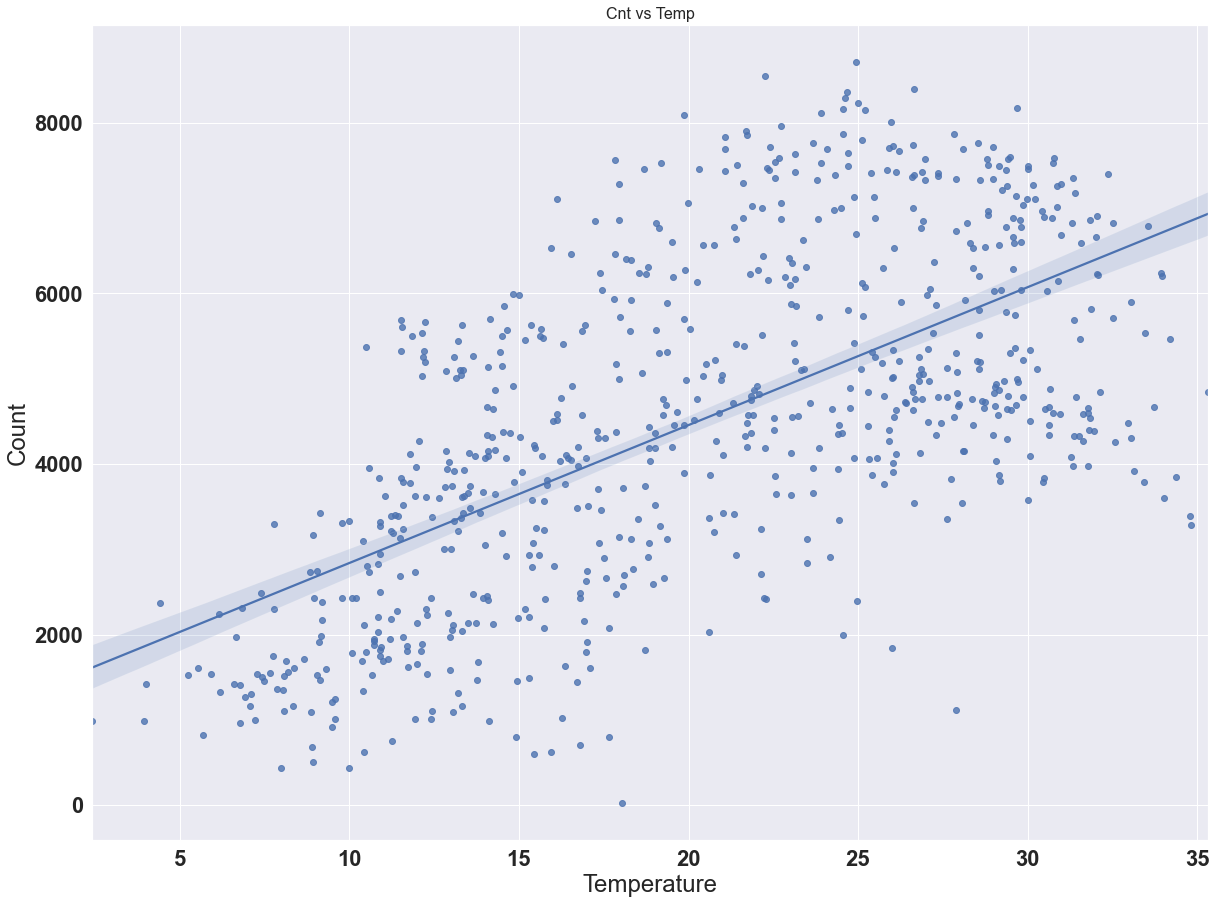

In [41]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.figure(figsize=(20,15))

plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bs_df,x="temp",y="cnt")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

<Figure size 2160x1440 with 0 Axes>

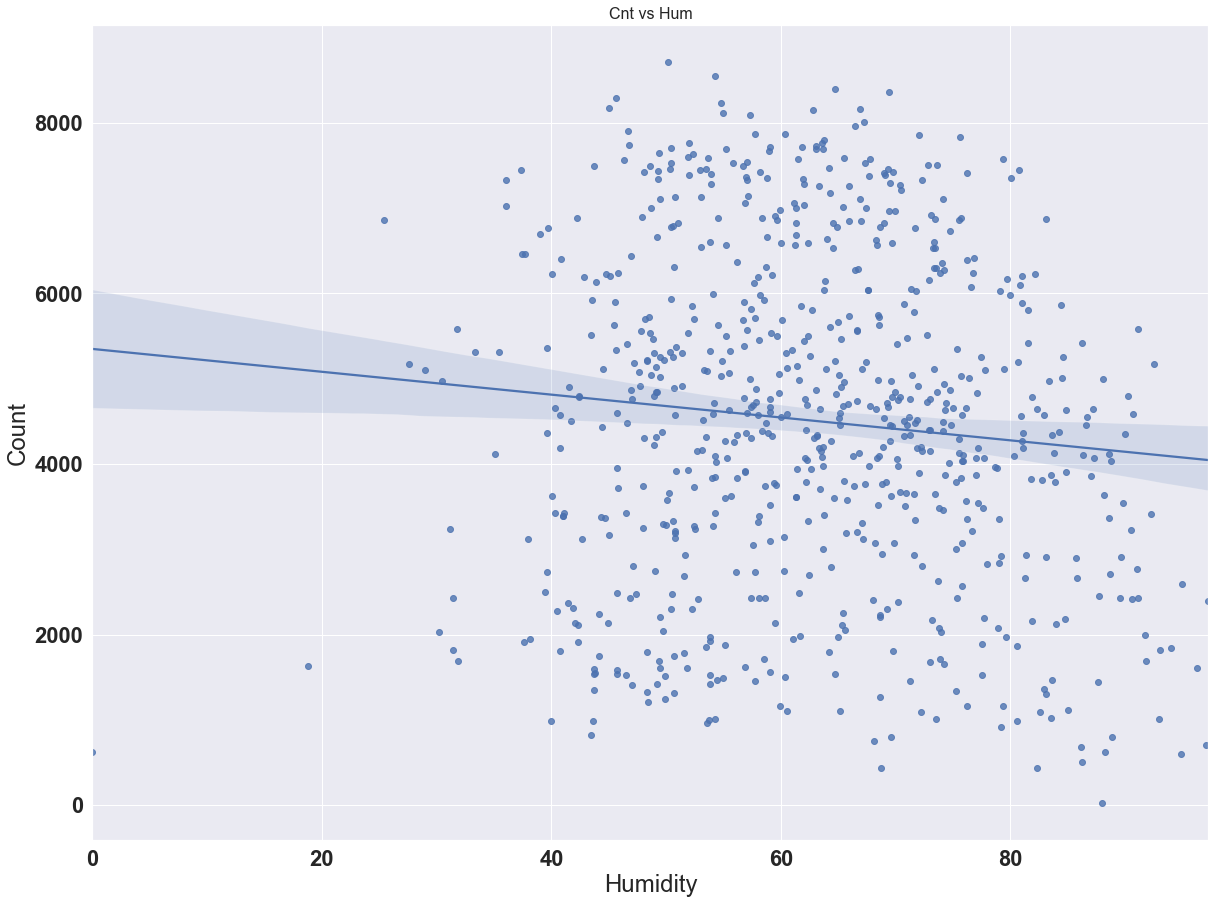

In [42]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.figure(figsize=(20,15))

plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bs_df,x="hum",y="cnt")
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

<Figure size 2160x1440 with 0 Axes>

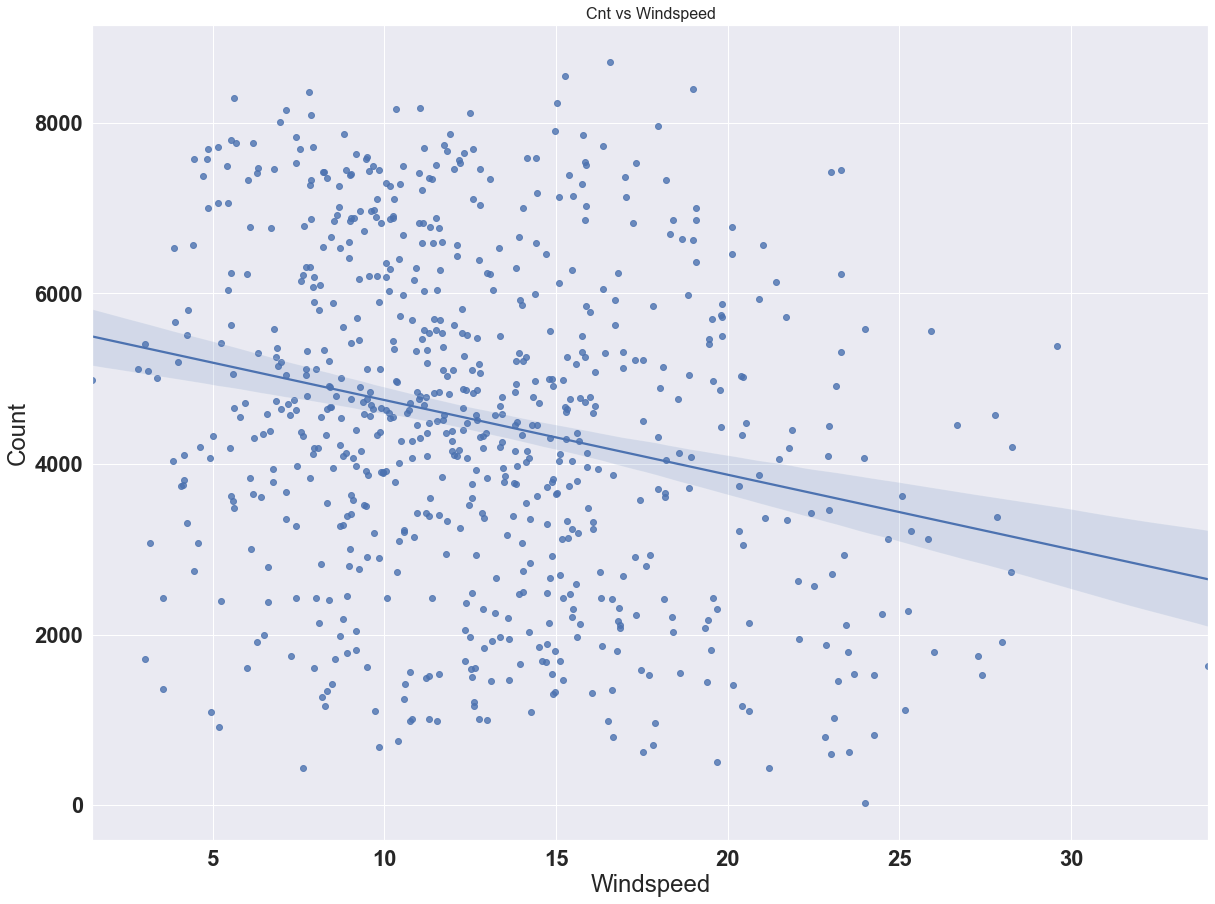

In [43]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.figure(figsize=(20,15))

plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bs_df,x="windspeed",y="cnt")
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.show()

### <span style = "color: Magenta"> 4. Data Preparation for regression model</span>

In [44]:
bs_df.head()

season    yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring  2018  jan        0     mon           1      Misty  14.110847   
1  spring  2018  jan        0     tue           1      Misty  14.902598   
2  spring  2018  jan        0     wed           1      Clear   8.050924   
3  spring  2018  jan        0     thu           1      Clear   8.200000   
4  spring  2018  jan        0     fri           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [45]:
# bucketing the year column

bs_df.yr = bs_df.yr.map({2018:0, 2019:1})

In [46]:
bs_df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1      Misty  14.110847   
1  spring   0  jan        0     tue           1      Misty  14.902598   
2  spring   0  jan        0     wed           1      Clear   8.050924   
3  spring   0  jan        0     thu           1      Clear   8.200000   
4  spring   0  jan        0     fri           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [47]:
bs_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

####  <span style = "color: LimeGreen"> creating dummy variable as we know need n-1 dummies for n variables</span>

In [48]:
# Get dummy variables for categorical variables

bs_df = pd.get_dummies(data=bs_df,columns=["season"],drop_first=True)
bs_df = pd.get_dummies(data=bs_df,columns=["mnth"],drop_first=True)
bs_df = pd.get_dummies(data=bs_df,columns=["weekday"],drop_first=True)
bs_df = pd.get_dummies(data=bs_df,columns=["weathersit"],drop_first=True)

In [49]:
bs_df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_spring  season_summer  ...  mnth_oct  mnth_sep  weekday_mon  \
0              1              0  ...         0         0            1   
1              1              0  ...         0         0            0   
2              1              0  ...         0         0            0   
3              1              0  ...         0         0            0   
4              1              0  ...         0         0            0   

   weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   weathersit_Light_snowrain  weathersit_Misty  
0                          0                 1  
1                          0                 1  
2                          0                 0  
3                          0                 0  
4                          0                 0  

[5 rows x 30 columns]

#### Get Columns 

In [50]:
bs_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [51]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  mnth_aug                   730 non-null    uint8  
 12  mnth_dec                   730 non-null    uint8  
 13  mnth_feb                   730 non-null    uint8  

In [52]:
bs_df.shape

(730, 30)

### <span style = "color: Magenta"> 5. Model Preparation</span>

####  <span style = "color: LimeGreen"> 5.1 splitting the data into Train and Test</span>

In [53]:
# y is target variable
y=bs_df.pop('cnt')

#X is independent variable
X=bs_df


In [54]:
np.random.seed(0)
X_bs_df_train, X_bs_df_test, y_bs_df_train, y_bs_df_test = train_test_split(X,y, train_size = 0.7, random_state = 100)

In [55]:
X_bs_df_train.shape

(510, 29)

In [56]:
X_bs_df_test.shape

(220, 29)

In [57]:
X.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   
2   0        0           1   8.050924   9.47025  43.7273  16.636703   
3   0        0           1   8.200000  10.60610  59.0435  10.739832   
4   0        0           1   9.305237  11.46350  43.6957  12.522300   

   season_spring  season_summer  season_winter  ...  mnth_oct  mnth_sep  \
0              1              0              0  ...         0         0   
1              1              0              0  ...         0         0   
2              1              0              0  ...         0         0   
3              1              0              0  ...         0         0   
4              1              0              0  ...         0         0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_wed  weathersit_Light_snowrain  weathersit_Misty  
0            0                          0                 1  
1            0                          0                 1  
2            1                          0                 0  
3            0                          0                 0  
4            0                          0                 0  

[5 rows x 29 columns]

In [58]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

####  <span style = "color: LimeGreen"> 5.2 Rescaling Features</span>

In [59]:
X_bs_df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [60]:
scaler = MinMaxScaler()

In [61]:
# scaling numerical variable columns

cont_var = ['temp','atemp','hum','windspeed']

In [62]:
#Fit and transform for training set 
X_bs_df_train[cont_var] = scaler.fit_transform(X_bs_df_train[cont_var])

X_bs_df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           0  0.345824  0.318819  0.751824   0.380981   

     season_spring  season_summer  season_winter  ...  mnth_oct  mnth_sep  \
576              0              0              0  ...         0         0   
426              1              0              0  ...         0         0   
728              1              0              0  ...         0         0   
482              0              1              0  ...         0         0   
111              0              1              0  ...         0         0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
576            0            0            0            0            0   
426            0            0            1            0            0   
728            1            0            0            0            0   
482            0            0            1            0            0   
111            0            0            1            0            0   

     weekday_wed  weathersit_Light_snowrain  weathersit_Misty  
576            1                          0                 0  
426            0                          0                 1  
728            0                          0                 0  
482            0                          0                 1  
111            0                          0                 1  

[5 rows x 29 columns]

####  <span style = "color: LimeGreen"> 5.3 RFE and Automated approach towrads budiling Regression model</span>

In [63]:
# RFE using SKLearn 
lr = LinearRegression()
lr.fit(X_bs_df_train,y_bs_df_train)

LinearRegression()

In [64]:
len(X_bs_df_train.columns)

29

In [65]:
# Lets build a model using first 25 columns
bs_rfe = RFE(lr,25)
bs_rfe.fit(X_bs_df_train,y_bs_df_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [66]:
#Check now which columns are randomly selected by RFE and how their weighatge is
list(zip(X_bs_df_train.columns,bs_rfe.support_,bs_rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 2),
 ('mnth_mar', False, 5),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 3),
 ('mnth_sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 4),
 ('weekday_tue', True, 1),
 ('weekday_wed', True, 1),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

#### Looking at above weightages it looks like need to eliminate some manually and for that we can use correlational conditions and multi colineairty (this can be done by VIF)

####  <span style = "color: LimeGreen"> 5.4 VIF approach to eliminate some features</span>

In [67]:
# A fucntion to check VIF 
def cal_VIF(cols):
    df = X_bs_df_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [68]:
#Which columns are selected by RFE
X_bs_df_train.columns[bs_rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [69]:
# Which are not selected by RFE approach

#Which columns are selected by RFE
X_bs_df_train.columns[~bs_rfe.support_]

Index(['mnth_june', 'mnth_mar', 'mnth_oct', 'weekday_thu'], dtype='object')

In [70]:
# now lest create a list of columns selected by RFE

X_bs_train_rfe = X_bs_df_train[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty']]

In [71]:
X_bs_train_rfe.shape

(510, 25)

In [72]:
# A generalise function to get linear regression 
def bs_model(bs_cols):
    X_bs_train_sm = sm.add_constant(X_bs_df_train[bs_cols])
    lm = sm.OLS(y_bs_df_train, X_bs_train_sm).fit()
    print(lm.summary())
    return lm

### <span style = "color: Magenta"> 6. Building a regression model</span>

In [73]:
# a model on columns selected by RFE 
bs_cols = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.25e-181
Time:                        17:31:43   Log-Likelihood:                -4102.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     484   BIC:                             8368.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
3                        temp  401.28
4                       atemp  374.74
2                  workingday   54.55
5                         hum   39.20
20                weekday_sun   10.82
19                weekday_sat   10.45
7               season_spring   10.30
8               season_summer    8.11
9               season_winter    7.89
6                   windspeed    5.74
10                   mnth_aug    3.46
14                  mnth_july    3.00
1                     holiday    2.57
13                   mnth_jan    2.55
24           weathersit_Misty    2.42
17                   mnth_sep    2.35
0                          yr    2.12
16                   mnth_nov    2.04
12                   mnth_feb    1.98
11                   mnth_dec    1.78
15                   mnth_may    1.64
21                weekday_tue    1.56
18                weekday_mon    1.55
22                weekday_wed    1.53
23  weathersit_Light_snowrain    1.32

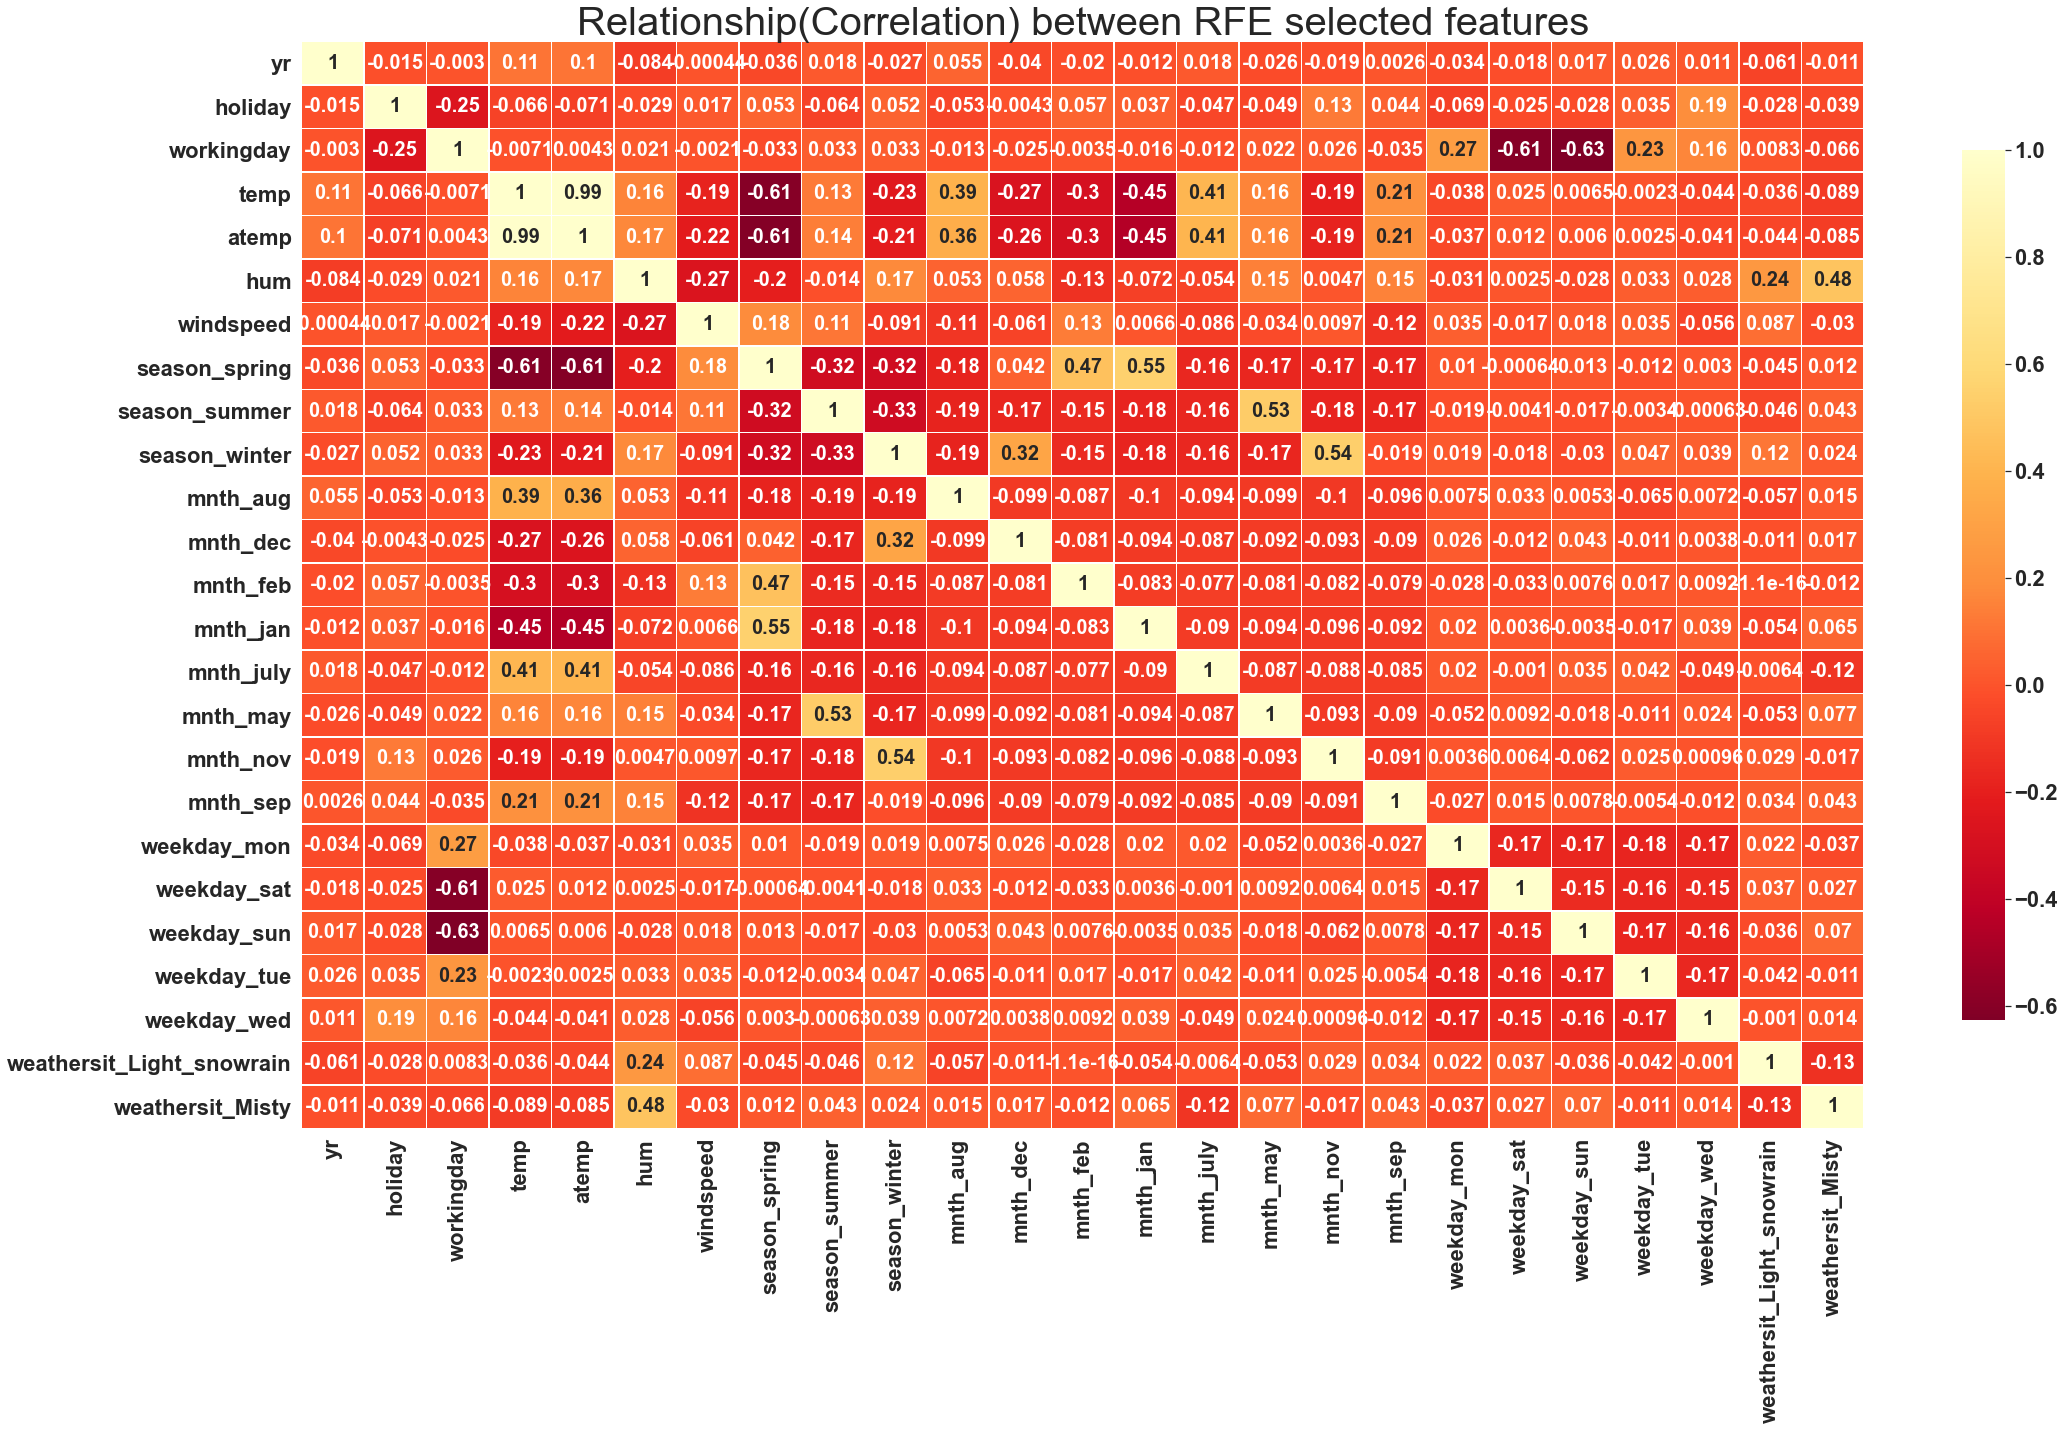

In [74]:
# Checking correlation of features selected by RFE with target column. 
bs_cols = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty']

plt.figure(figsize = (35,20))
sns.set(font_scale = 2)
sns.heatmap(X_bs_df_train[bs_cols].corr(), linewidths=0.5, cmap="YlOrRd_r",cbar_kws={"shrink": .8},annot=True,annot_kws={"fontsize":20})
sns.set(font_scale=1.5) 
plt.title('Relationship(Correlation) between RFE selected features', fontsize = 40)
plt.show()

### <span style = "color: LimeGreen"> 6.1  Model: 1</span>

In [75]:
# Now looking at stats negative coefficient for atemp this can be dropped
bs_cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.22e-182
Time:                        17:31:46   Log-Likelihood:                -4102.9
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     485   BIC:                             8362.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
2                  workingday  54.55
4                         hum  39.11
3                        temp  29.71
19                weekday_sun  10.82
18                weekday_sat  10.44
6               season_spring  10.24
7               season_summer   8.04
8               season_winter   7.81
5                   windspeed   5.50
9                    mnth_aug   3.44
13                  mnth_july   3.00
1                     holiday   2.57
12                   mnth_jan   2.55
23           weathersit_Misty   2.42
16                   mnth_sep   2.35
0                          yr   2.12
15                   mnth_nov   2.04
11                   mnth_feb   1.98
10                   mnth_dec   1.78
14                   mnth_may   1.63
20                weekday_tue   1.56
17                weekday_mon   1.55
21                weekday_wed   1.53
22  weathersit_Light_snowrain   1.32

### <span style = "color: LimeGreen"> 6.2  Model: 2</span>

In [76]:
# Now looking at the heatmap and negative coefficient for weekday_sun this can be dropped
bs_cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.42e-183
Time:                        17:31:46   Log-Likelihood:                -4103.2
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     486   BIC:                             8356.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
4                         hum  34.32
3                        temp  21.83
2                  workingday   7.46
6               season_spring   7.37
8               season_winter   5.99
7               season_summer   5.87
5                   windspeed   4.96
9                    mnth_aug   3.14
13                  mnth_july   2.79
12                   mnth_jan   2.42
22           weathersit_Misty   2.38
16                   mnth_sep   2.15
0                          yr   2.11
11                   mnth_feb   1.94
15                   mnth_nov   1.91
18                weekday_sat   1.89
10                   mnth_dec   1.68
14                   mnth_may   1.60
17                weekday_mon   1.55
19                weekday_tue   1.55
20                weekday_wed   1.52
1                     holiday   1.33
21  weathersit_Light_snowrain   1.30

### <span style = "color: LimeGreen"> 6.3  Model: 3</span>

In [77]:
# Now looking at the heatmap and negative coefficient for weekday_sat this can be dropped
bs_cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'weekday_mon', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.41e-184
Time:                        17:31:46   Log-Likelihood:                -4103.3
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     487   BIC:                             8350.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
4                         hum  34.11
3                        temp  21.39
6               season_spring   7.17
8               season_winter   5.89
7               season_summer   5.74
2                  workingday   5.15
5                   windspeed   4.95
9                    mnth_aug   3.12
13                  mnth_july   2.78
12                   mnth_jan   2.41
21           weathersit_Misty   2.38
16                   mnth_sep   2.14
0                          yr   2.11
11                   mnth_feb   1.94
15                   mnth_nov   1.89
10                   mnth_dec   1.68
14                   mnth_may   1.60
17                weekday_mon   1.55
18                weekday_tue   1.55
19                weekday_wed   1.52
20  weathersit_Light_snowrain   1.30
1                     holiday   1.27

### <span style = "color: LimeGreen"> 6.4  Model:4 </span>

In [78]:
# Now looking at the heatmap and negative coefficient for workingday this can be dropped
bs_cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'weekday_mon', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.41e-185
Time:                        17:31:46   Log-Likelihood:                -4103.5
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     488   BIC:                             8344.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
3                         hum  33.65
2                        temp  21.17
5               season_spring   7.14
7               season_winter   5.88
6               season_summer   5.70
4                   windspeed   4.94
8                    mnth_aug   3.12
12                  mnth_july   2.78
11                   mnth_jan   2.41
20           weathersit_Misty   2.34
15                   mnth_sep   2.13
0                          yr   2.11
10                   mnth_feb   1.93
14                   mnth_nov   1.87
9                    mnth_dec   1.68
13                   mnth_may   1.60
17                weekday_tue   1.31
18                weekday_wed   1.30
19  weathersit_Light_snowrain   1.30
16                weekday_mon   1.29
1                     holiday   1.11

### <span style = "color: LimeGreen"> 6.5  Model:5 </span>

In [79]:
# Now looking at the heatmap and negative coefficient for mnth_aug this can be dropped
bs_cols =  ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_may', 
        'mnth_nov','mnth_sep', 'weekday_mon', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty']


bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.66e-186
Time:                        17:31:46   Log-Likelihood:                -4103.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     489   BIC:                             8339.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
3                         hum  32.04
2                        temp  18.41
5               season_spring   5.45
4                   windspeed   4.87
7               season_winter   4.10
6               season_summer   3.35
10                   mnth_jan   2.38
19           weathersit_Misty   2.34
0                          yr   2.11
9                    mnth_feb   1.92
13                   mnth_nov   1.87
8                    mnth_dec   1.68
11                  mnth_july   1.61
12                   mnth_may   1.58
14                   mnth_sep   1.41
16                weekday_tue   1.31
17                weekday_wed   1.30
15                weekday_mon   1.29
18  weathersit_Light_snowrain   1.29
1                     holiday   1.11

### <span style = "color: LimeGreen"> 6.6  Model:6 </span>

In [80]:
# Now looking at the heatmap and negative coefficient for weekday_wed this can be dropped
bs_cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_may', 
        'mnth_nov','mnth_sep', 'weekday_mon', 'weekday_tue',
        'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.45e-187
Time:                        17:31:46   Log-Likelihood:                -4104.4
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     490   BIC:                             8334.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
3                         hum  31.84
2                        temp  18.41
5               season_spring   5.45
4                   windspeed   4.87
7               season_winter   4.08
6               season_summer   3.35
10                   mnth_jan   2.38
18           weathersit_Misty   2.34
0                          yr   2.11
9                    mnth_feb   1.92
13                   mnth_nov   1.87
8                    mnth_dec   1.68
11                  mnth_july   1.61
12                   mnth_may   1.58
14                   mnth_sep   1.41
17  weathersit_Light_snowrain   1.29
16                weekday_tue   1.25
15                weekday_mon   1.24
1                     holiday   1.07

### <span style = "color: LimeGreen"> 6.7  Model:7 </span>

In [81]:
# Now looking at the heatmap and negative coefficient for mnth_may this can be dropped
bs_cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 
        'mnth_nov','mnth_sep', 'weekday_mon', 'weekday_tue',
        'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          3.77e-188
Time:                        17:31:46   Log-Likelihood:                -4105.1
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     491   BIC:                             8329.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
3                         hum  31.80
2                        temp  18.36
5               season_spring   5.45
4                   windspeed   4.78
7               season_winter   4.08
6               season_summer   2.82
10                   mnth_jan   2.38
17           weathersit_Misty   2.34
0                          yr   2.10
9                    mnth_feb   1.92
12                   mnth_nov   1.87
8                    mnth_dec   1.68
11                  mnth_july   1.61
13                   mnth_sep   1.41
16  weathersit_Light_snowrain   1.29
15                weekday_tue   1.25
14                weekday_mon   1.23
1                     holiday   1.07

### <span style = "color: LimeGreen"> 6.8  Model:8 </span>

In [82]:
# Now looking at the heatmap and negative coefficient for mnth_feb this can be dropped
bs_cols =  ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july', 
        'mnth_nov','mnth_sep', 'weekday_mon', 'weekday_tue',
        'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.21e-188
Time:                        17:31:46   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     492   BIC:                             8325.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
3                         hum  31.17
2                        temp  17.82
4                   windspeed   4.77
5               season_spring   4.37
7               season_winter   4.08
6               season_summer   2.82
16           weathersit_Misty   2.33
0                          yr   2.09
11                   mnth_nov   1.85
9                    mnth_jan   1.75
10                  mnth_july   1.60
8                    mnth_dec   1.56
12                   mnth_sep   1.41
15  weathersit_Light_snowrain   1.29
14                weekday_tue   1.25
13                weekday_mon   1.23
1                     holiday   1.07

### <span style = "color: LimeGreen"> 6.9  Model:9 </span>

In [83]:
# Now looking at the heatmap and negative coefficient for weekday_mon this can be dropped
bs_cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed','season_spring', 'season_summer', 'season_winter', 'mnth_dec', 
           'mnth_jan', 'mnth_july', 'mnth_nov','mnth_sep', 'weekday_tue',
        'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.6
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.28e-188
Time:                        17:31:46   Log-Likelihood:                -4109.3
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     493   BIC:                             8325.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
3                         hum  31.08
2                        temp  17.82
4                   windspeed   4.74
5               season_spring   4.37
7               season_winter   4.07
6               season_summer   2.82
15           weathersit_Misty   2.33
0                          yr   2.09
11                   mnth_nov   1.85
9                    mnth_jan   1.75
10                  mnth_july   1.60
8                    mnth_dec   1.56
12                   mnth_sep   1.41
14  weathersit_Light_snowrain   1.28
13                weekday_tue   1.20
1                     holiday   1.06

### <span style = "color: LimeGreen"> 6.10  Model:10 </span>

In [84]:
# Now looking at the heatmap and negative coefficient for weekday_tue this can be dropped
bs_cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed','season_spring', 'season_summer', 'season_winter', 'mnth_dec', 
           'mnth_jan', 'mnth_july', 'mnth_nov','mnth_sep', 'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          8.15e-189
Time:                        17:31:46   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
3                         hum  30.89
2                        temp  17.79
4                   windspeed   4.72
5               season_spring   4.37
7               season_winter   4.06
6               season_summer   2.82
14           weathersit_Misty   2.32
0                          yr   2.09
11                   mnth_nov   1.85
9                    mnth_jan   1.75
10                  mnth_july   1.59
8                    mnth_dec   1.56
12                   mnth_sep   1.41
13  weathersit_Light_snowrain   1.28
1                     holiday   1.06

### <span style = "color: LimeGreen"> 6.11  Model:11 </span>

In [85]:
# Now looking at the heatmap and negative coefficient for hum this can be dropped
bs_cols = ['yr', 'holiday', 'temp', 'windspeed','season_spring', 'season_summer', 'season_winter', 'mnth_dec', 
           'mnth_jan', 'mnth_july', 'mnth_nov','mnth_sep', 'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          4.75e-186
Time:                        17:31:47   Log-Likelihood:                -4120.9
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     495   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
2                        temp  5.17
3                   windspeed  4.67
6               season_winter  2.95
4               season_spring  2.89
5               season_summer  2.24
0                          yr  2.07
10                   mnth_nov  1.81
8                    mnth_jan  1.66
9                   mnth_july  1.59
13           weathersit_Misty  1.57
7                    mnth_dec  1.47
11                   mnth_sep  1.35
12  weathersit_Light_snowrain  1.09
1                     holiday  1.06

### <span style = "color: LimeGreen"> 6.12  Model:12 </span>

In [86]:
# Now looking at the heatmap and negative coefficient for 'mnth_dec','mnth_jan', 'mnth_july', 'mnth_nov'  this can be dropped
bs_cols = ['yr', 'holiday', 'temp', 'windspeed','season_spring', 'season_summer', 'season_winter',
           'mnth_sep', 'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_cols)
cal_VIF(bs_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.47e-186
Time:                        17:31:47   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
3                  windspeed  4.60
2                       temp  3.84
0                         yr  2.07
4              season_spring  1.99
5              season_summer  1.90
6              season_winter  1.63
9           weathersit_Misty  1.55
7                   mnth_sep  1.23
8  weathersit_Light_snowrain  1.08
1                    holiday  1.04

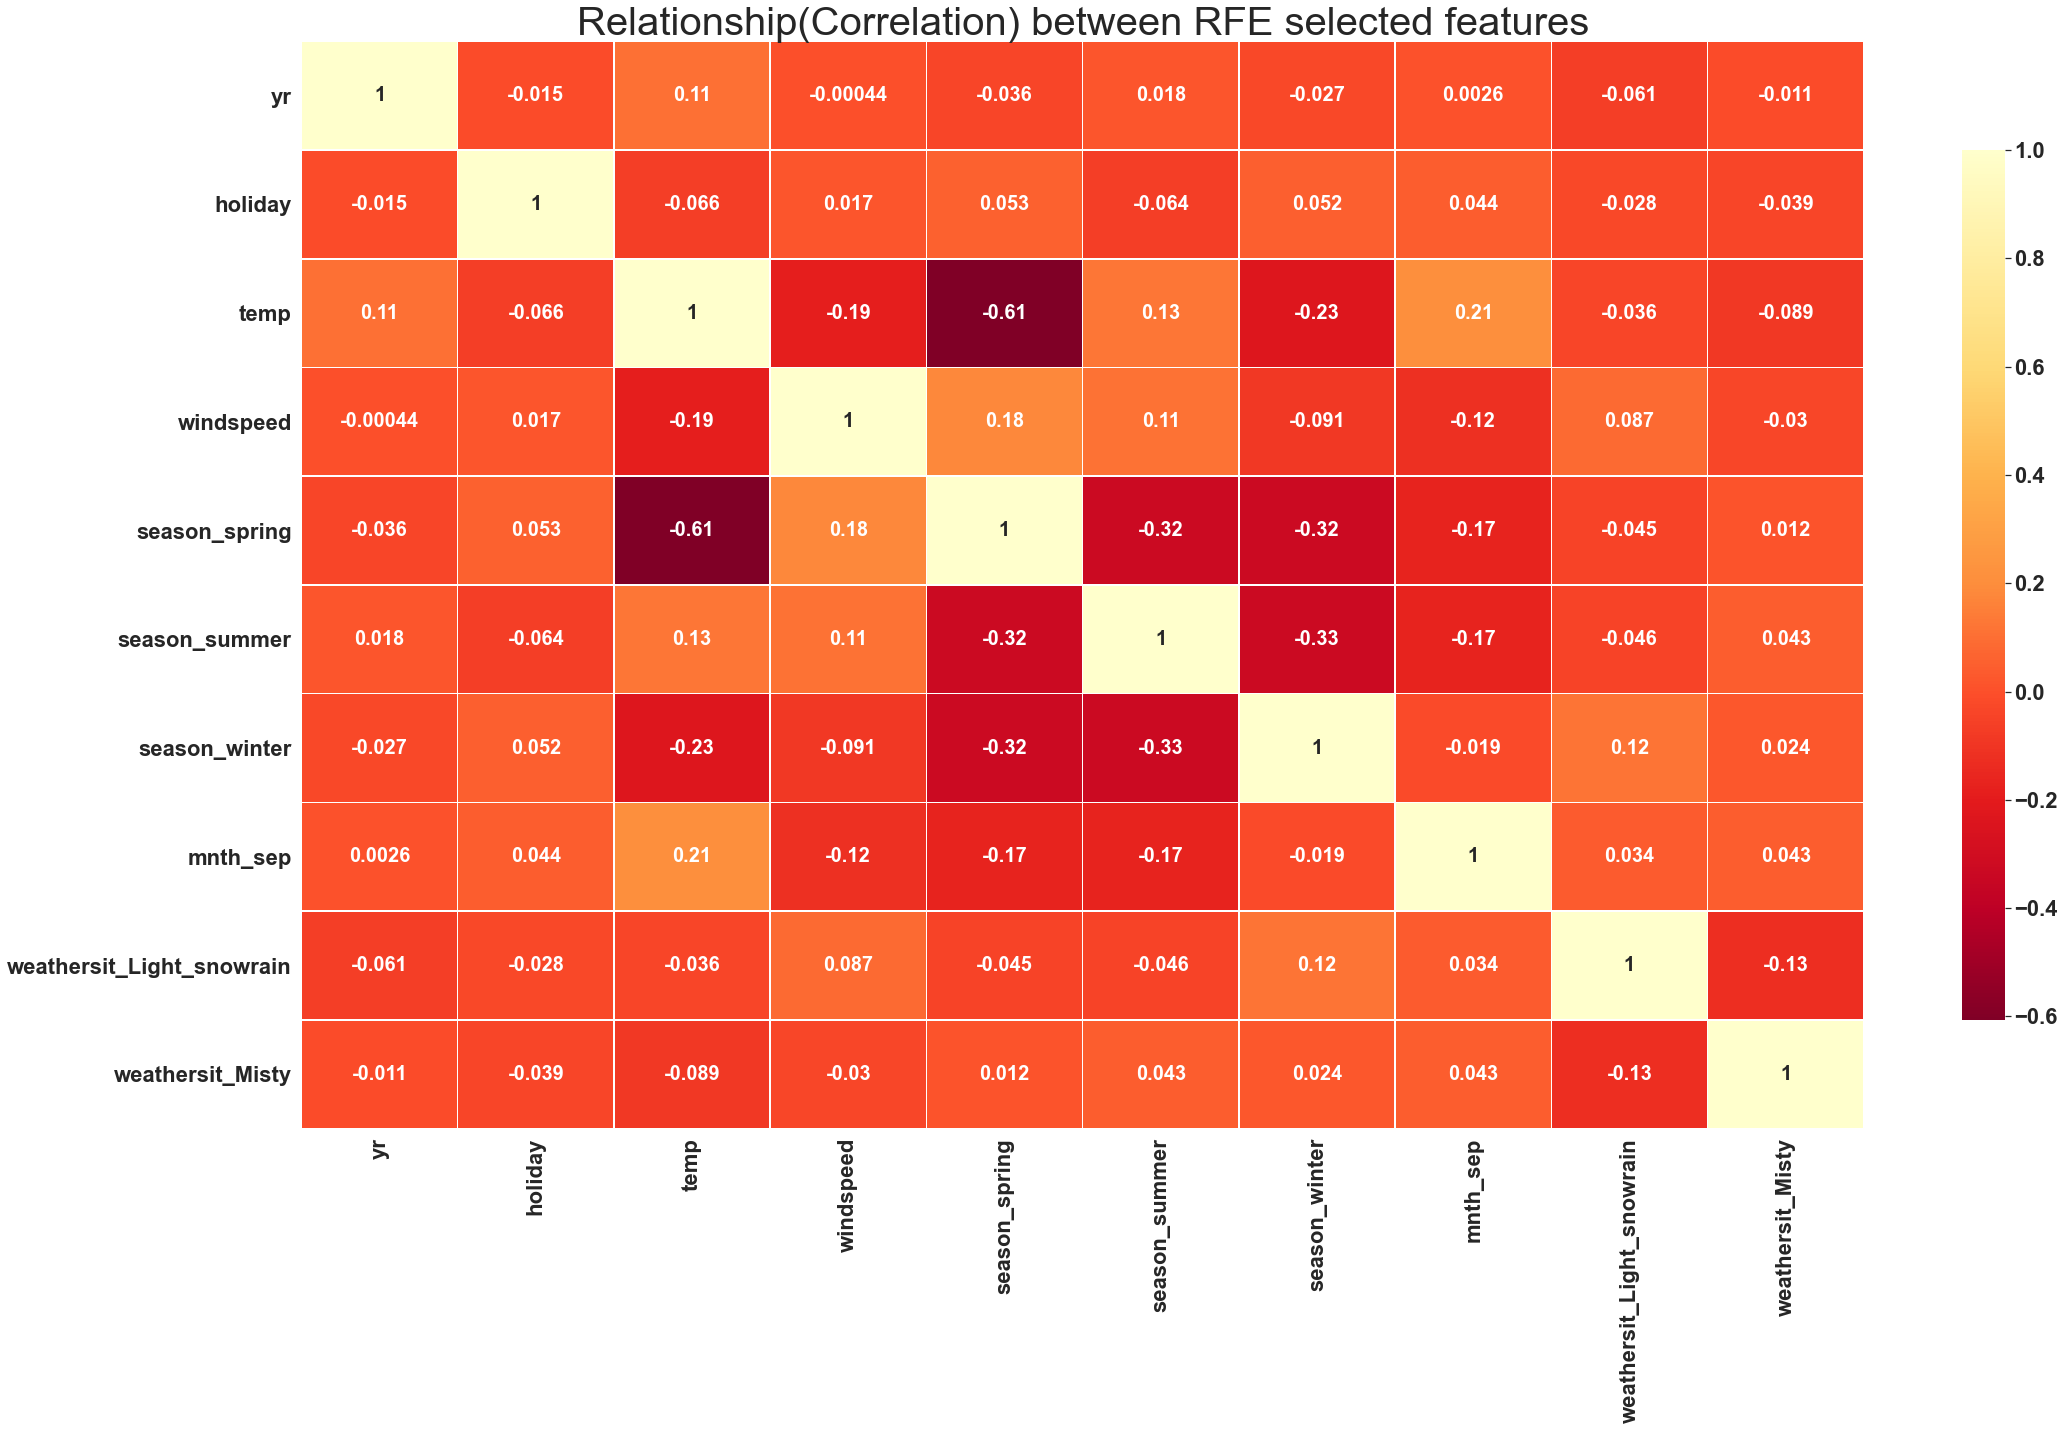

In [87]:
# Checking correlation of features selected by RFE with target column. 
bs_cols =['yr', 'holiday', 'temp', 'windspeed','season_spring', 'season_summer', 'season_winter',
           'mnth_sep', 'weathersit_Light_snowrain', 'weathersit_Misty']
plt.figure(figsize = (35,20))
sns.set(font_scale = 2)
sns.heatmap(X_bs_df_train[bs_cols].corr(), linewidths=0.5, cmap="YlOrRd_r",cbar_kws={"shrink": .8},annot=True,annot_kws={"fontsize":20})
sns.set(font_scale=1.5) 
plt.title('Relationship(Correlation) between RFE selected features', fontsize = 40)
plt.show()

### <span style = "color: LightCoral"> Observations</span>
Here p-value for remaining features is ~ 0.0 and R2 is 83.3%.  Now as we can see VIF value is below 5 and  it is noticed that there is not a very strong relation between them and hence not multi colinear. Hence lets us select this model as R-square, Adjusted R-squared and F-statistic are all significant. Moreover R-squared and Adjusted R-squared values are quite close match. 

In [88]:
# Now take this feature build automatic model using scikit learn
def regression_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [89]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'holiday', 'temp', 'windspeed','season_spring', 'season_summer', 'season_winter',
           'mnth_sep', 'weathersit_Light_snowrain', 'weathersit_Misty']

lr = regression_model_sk(X_bs_df_train[cols],y_bs_df_train)
print(lr.intercept_,lr.coef_)

1680.9085201193202 [ 2035.07380264  -837.1793967   4152.48616651 -1287.26787409
  -481.59003194   539.56547565   821.18894256   790.95125669
 -2477.4932855   -684.41415243]


# <span style = "color: Magenta"> 7. Model Evaluation and Validation </span>

###   <span style = "color: LimeGreen"> 7.1  Residual Analysis of the train data set and its validation</span>

In [90]:
y_bs_train_pred = lr.predict(X_bs_df_train[cols])

###   <span style = "color: LimeGreen"> 7.2  Error Terms (Histogram)</span>

Text(0.5, 0, 'Errors')

<Figure size 2160x1440 with 0 Axes>

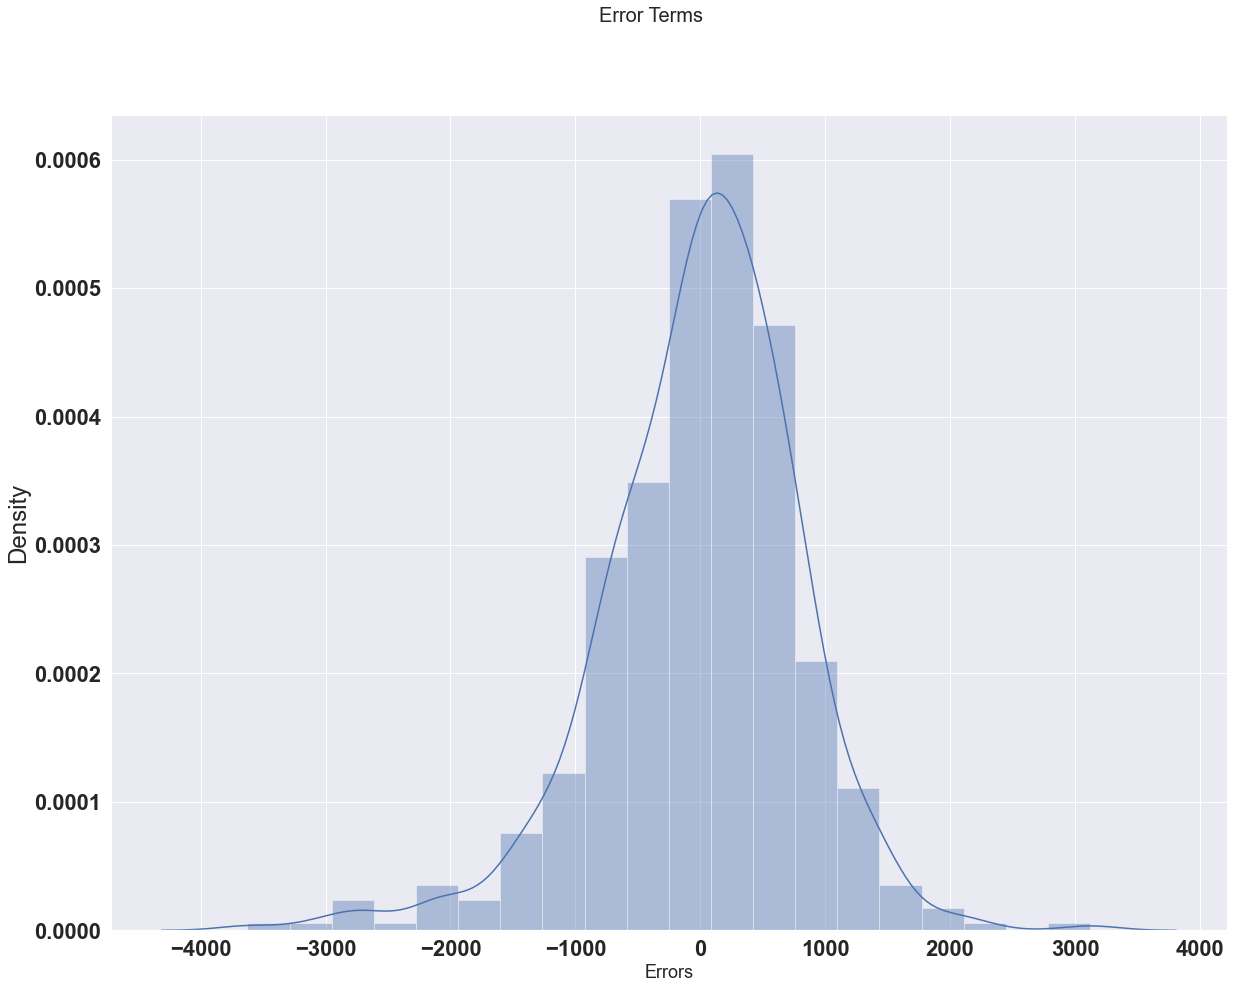

In [91]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
fig = plt.figure(figsize=(20,15))

sns.distplot((y_bs_df_train - y_bs_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

###  <span style = "color: DodgerBlue"> One of the assumption of regression analysis is "Error terms are normally distributed with mean zero": This has been validated</span>

<Figure size 2160x1440 with 0 Axes>

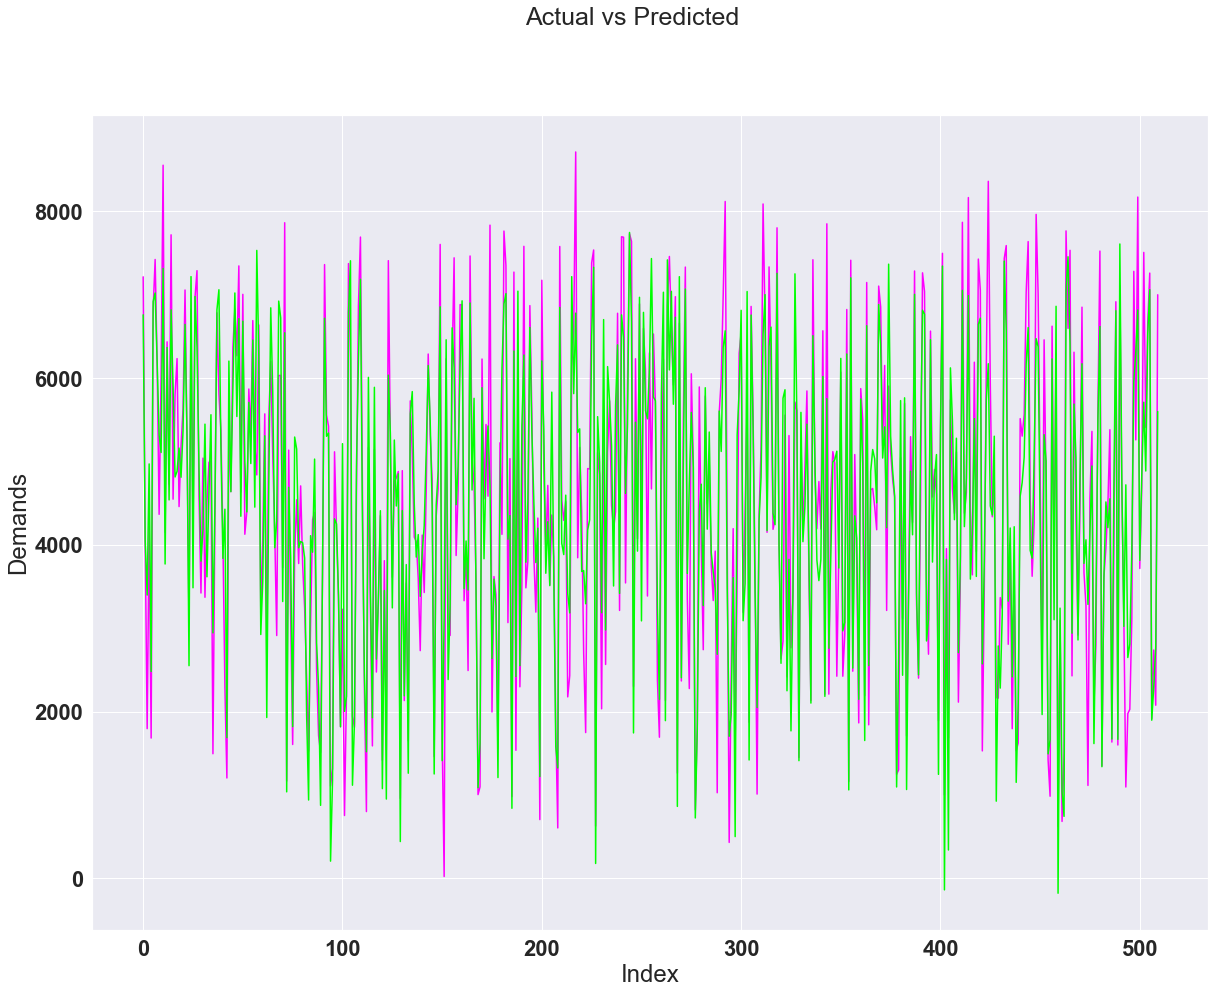

In [92]:
# Check patterns

from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.figure(figsize=(20,15))

p = [j for j in range(0,len(X_bs_df_train),1)]
plt.plot(p,y_bs_df_train, color="Fuchsia")
plt.plot(p,y_bs_train_pred, color="Lime")
plt.suptitle('Actual vs Predicted', fontsize = 25)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

<Figure size 2160x1440 with 0 Axes>

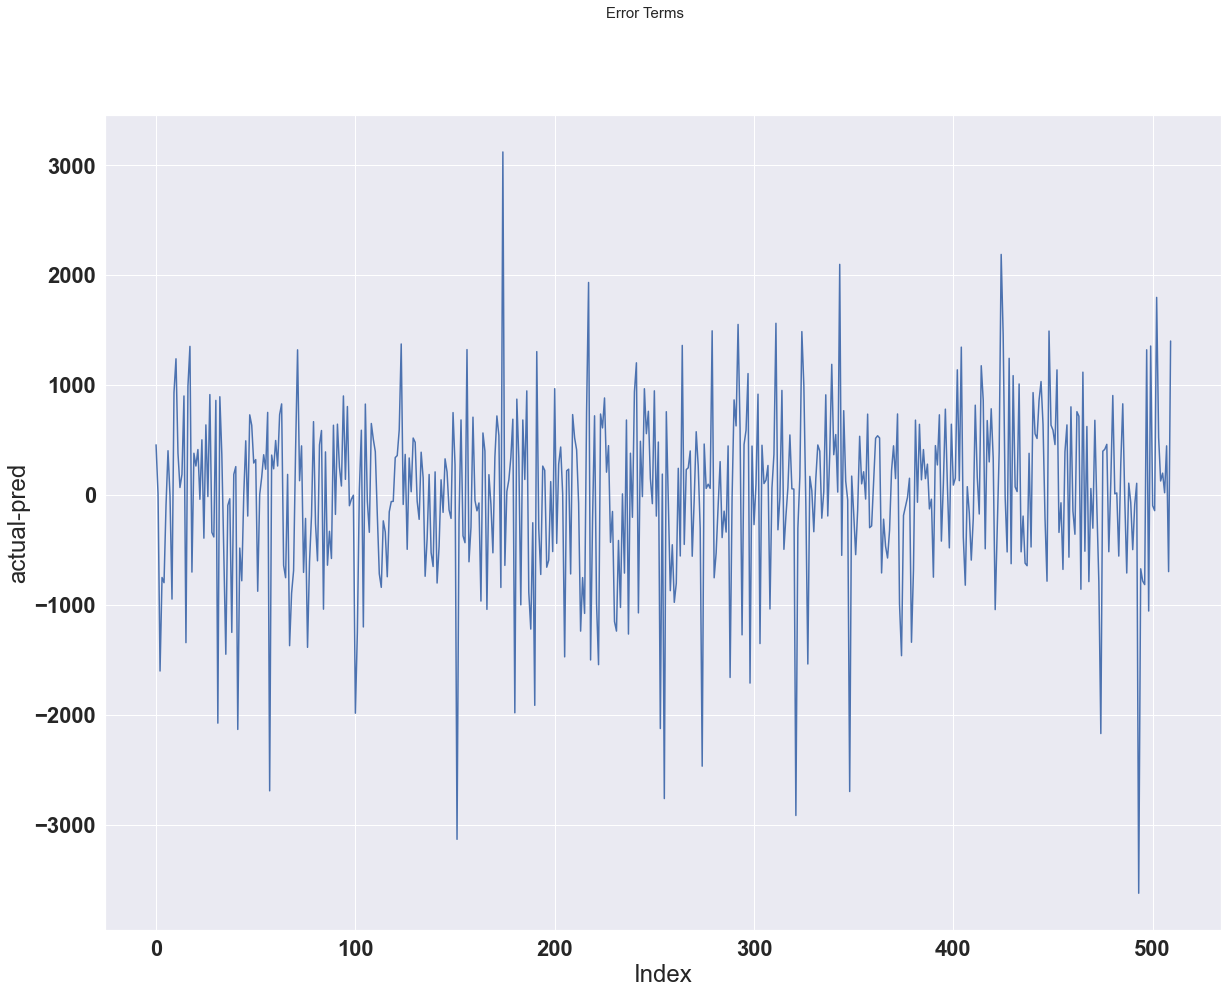

In [93]:
# Error Terms

from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.figure(figsize=(20,15))


p = [k for k in range(0,len(X_bs_df_train),1)]
plt.plot(p,y_bs_df_train-y_bs_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('actual-pred')
plt.show()

### Observations 
Error terms are independent of each other

###   <span style = "color: LimeGreen"> 7.3  Observe Linearity</span>


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.46e-61
Time:                        17:31:48   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.2143    170.676      8.737      0.0

<Figure size 2160x1440 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

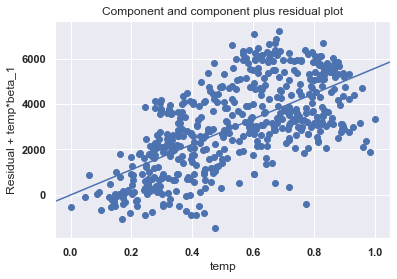

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.95e-49
Time:                        17:31:48   Log-Likelihood:                -4477.1
No. Observations:                 510   AIC:                             8958.
Df Residuals:                     508   BIC:                             8967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3314.5578     99.380     33.352      0.0

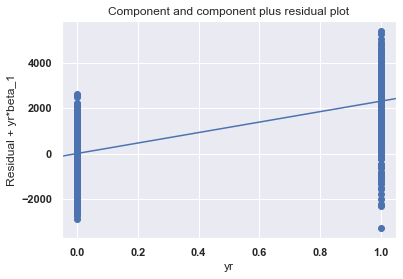

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     21.53
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           4.44e-06
Time:                        17:31:48   Log-Likelihood:                -4576.3
No. Observations:                 510   AIC:                             9157.
Df Residuals:                     508   BIC:                             9165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4369.1557     88.310     49.475      0.0

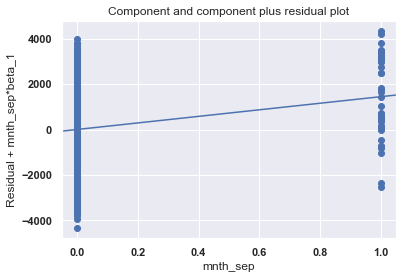

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     10.19
Date:                Mon, 06 Dec 2021   Prob (F-statistic):            0.00150
Time:                        17:31:49   Log-Likelihood:                -4581.8
No. Observations:                 510   AIC:                             9168.
Df Residuals:                     508   BIC:                             9176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4328.7682     98.657     43.877

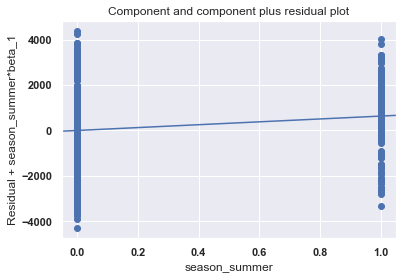

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3422
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.559
Time:                        17:31:49   Log-Likelihood:                -4586.7
No. Observations:                 510   AIC:                             9177.
Df Residuals:                     508   BIC:                             9186.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4456.3750     99.609     44.739

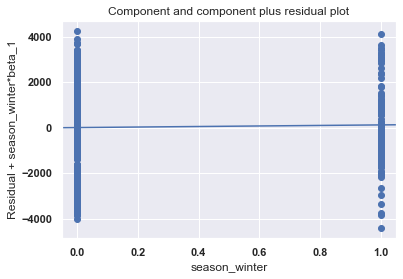

In [94]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 1)
plt.figure(figsize=(20,15))

sm.graphics.plot_ccpr(bs_model(['temp']), 'temp')
plt.show()

sm.graphics.plot_ccpr(bs_model(['yr']), 'yr')
plt.show()

sm.graphics.plot_ccpr(bs_model(['mnth_sep']), 'mnth_sep')
plt.show()

sm.graphics.plot_ccpr(bs_model(['season_summer']), 'season_summer')
plt.show()

sm.graphics.plot_ccpr(bs_model(['season_winter']), 'season_winter')
plt.show()

######  Observations
Above graph shows Linearity

###   <span style = "color: LimeGreen"> 7.4 Homoscedasticity</span>

Text(0, 0.5, 'y_train_pred')

<Figure size 2160x1440 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

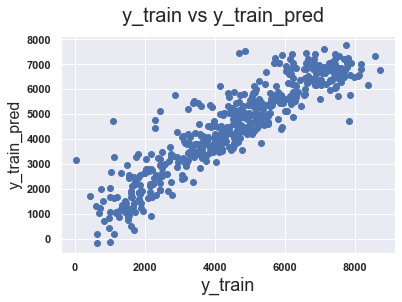

In [95]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 1)
plt.figure(figsize=(20,15))
fig = plt.figure()
plt.scatter(y_bs_df_train, y_bs_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)            
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)

######  Observations
Above graph shows Error terms have constant variance

In [96]:
#Print R-squared Value
r2_score(y_bs_df_train,y_bs_train_pred)

0.8327073211549113

###### R2 matches with our final model

###   <span style = "color: LimeGreen"> 7.5 Predict on test data set</span>

In [97]:
variable_features = ['temp','atemp','hum','windspeed']

X_bs_df_test[variable_features] = scaler.transform(X_bs_df_test[variable_features])

In [98]:
bs_columns =  ['yr', 'holiday', 'temp', 'windspeed','season_spring', 'season_summer', 'season_winter',
           'mnth_sep', 'weathersit_Light_snowrain', 'weathersit_Misty']


y_bs_test_pred = lr.predict(X_bs_df_test[bs_columns])

In [99]:
r2_score(y_bs_df_test,y_bs_test_pred)

0.803819599072884

#### Observations :
Predicted R-squared value on test data (0.832) is quite close to R-Squared value predicted on train data(0.803). This shows that model build is performing well on unseen data as well

###   <span style = "color: LimeGreen"> 7.6 Check patterns on test data</span>

<Figure size 2160x1440 with 0 Axes>

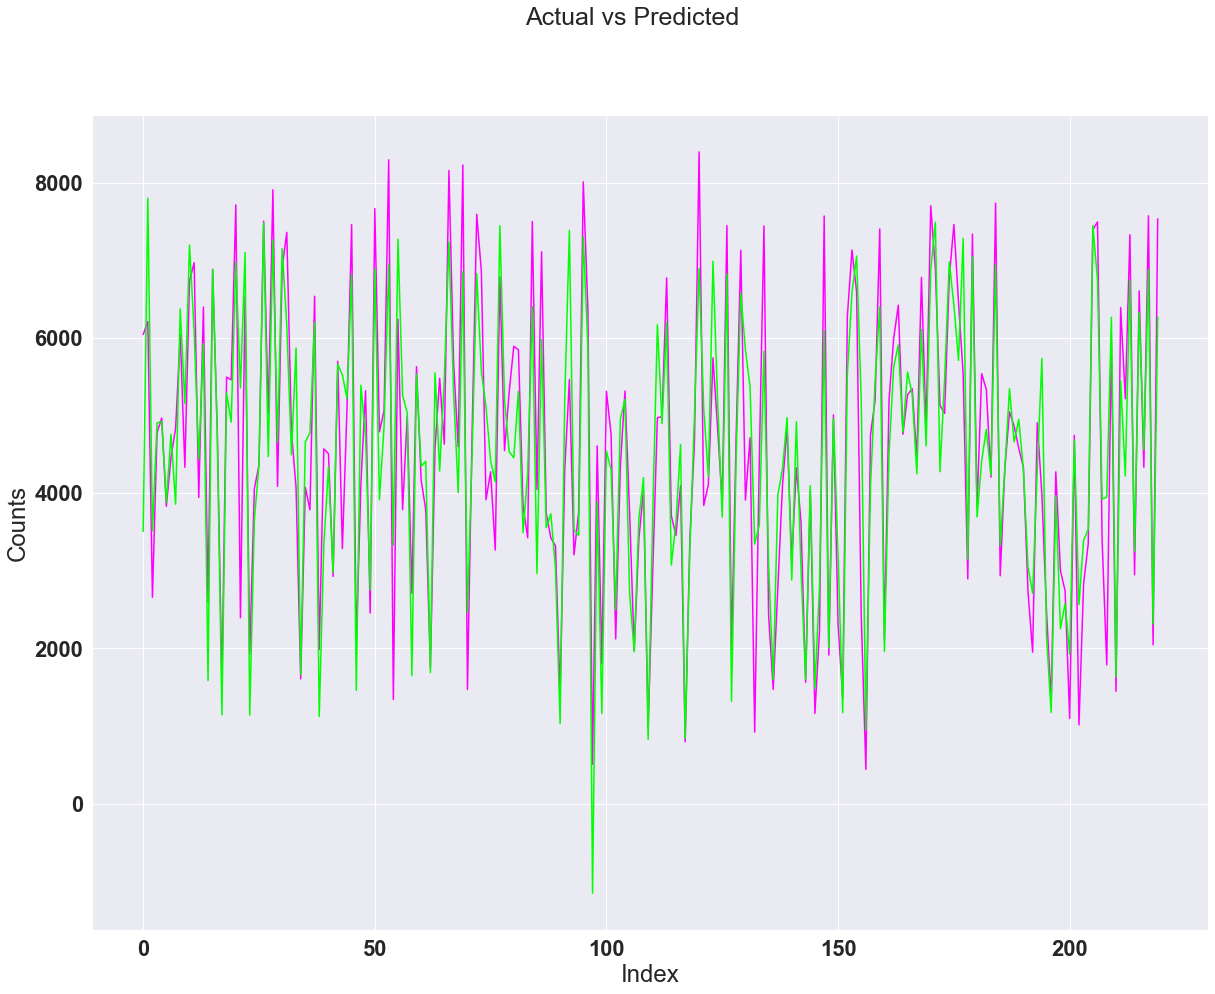

In [100]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.figure(figsize=(20,15))

q = [k for k in range(0,len(X_bs_df_test),1)]
plt.plot(q,y_bs_df_test, color="Fuchsia")
plt.plot(q,y_bs_test_pred, color="Lime")
plt.suptitle('Actual vs Predicted', fontsize = 25)
plt.xlabel('Index')
plt.ylabel('Counts')
plt.show()

###### Observations: 
As we can see predictions for test data is very close to actuals

<Figure size 2160x1440 with 0 Axes>

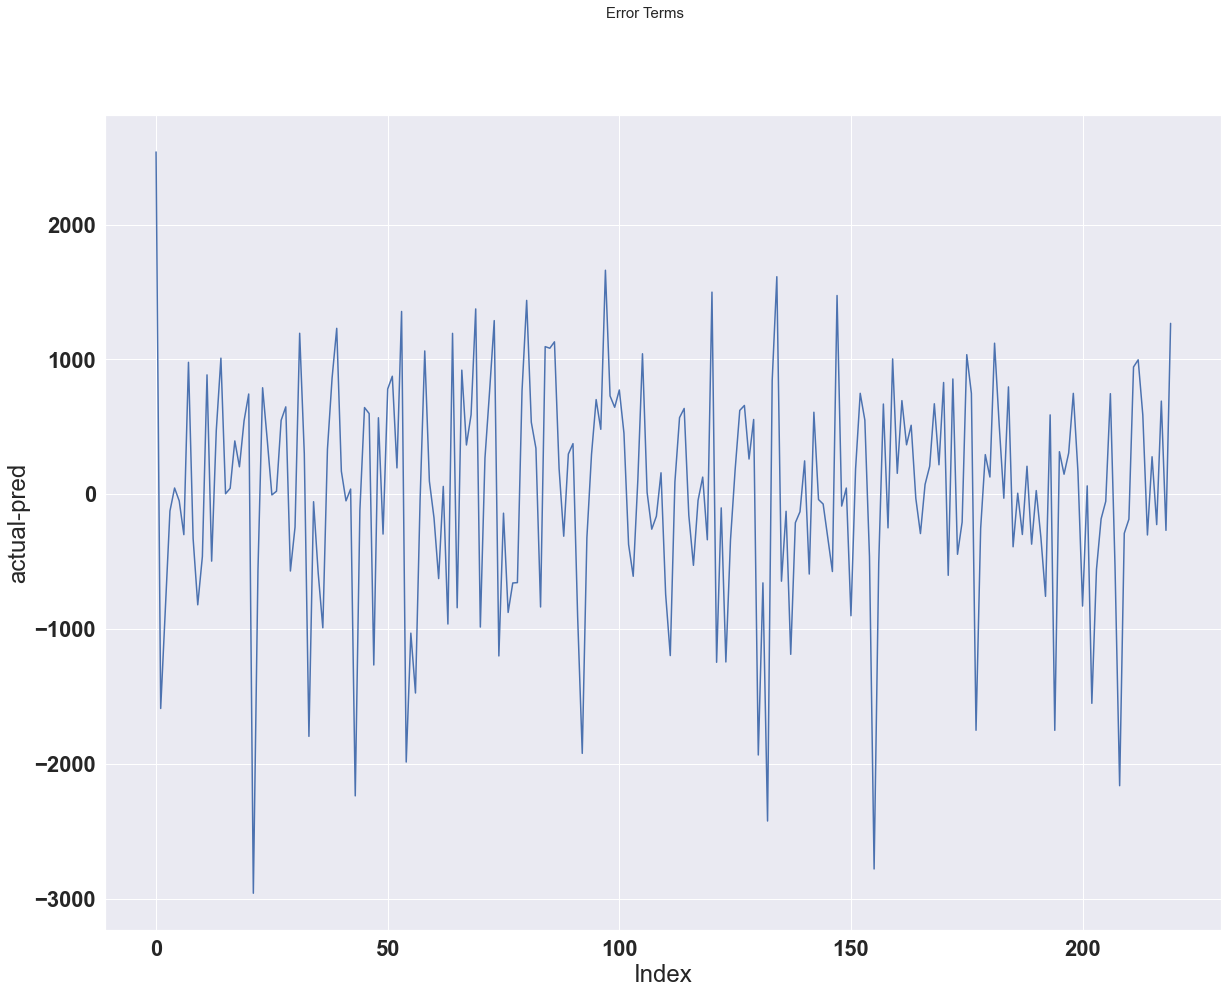

In [101]:
# Error Terms

from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
plt.figure(figsize=(20,15))


r = [l for l in range(0,len(X_bs_df_test),1)]
plt.plot(r,y_bs_df_test-y_bs_test_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('actual-pred')
plt.show()

### Observations: 
Error terms are independent of each other as it is randomly distributed

Text(0, 0.5, 'y_test_pred')

<Figure size 2160x1440 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

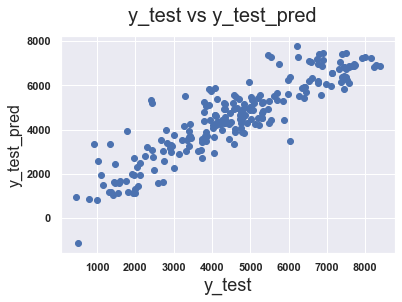

In [102]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 1)
plt.figure(figsize=(20,15))
fig = plt.figure()
plt.scatter(y_bs_df_test, y_bs_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)            
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

<Figure size 2160x1440 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

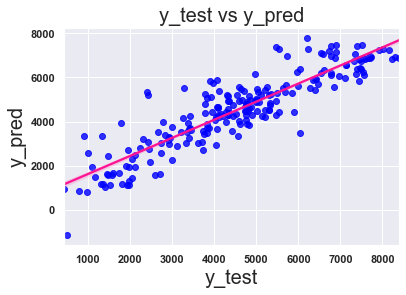

In [103]:
# Check a Regression plot

from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 1)
plt.figure(figsize=(20,15))
fig = plt.figure()

plt.figure()
sns.regplot(x=y_bs_df_test, y=y_bs_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "DeepPink"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=20)
plt.show()

###   <span style = "color: LimeGreen"> 7.7 Final Predictions</span>

In [104]:
bs_df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   
2   0        0           1   8.050924   9.47025  43.7273  16.636703   
3   0        0           1   8.200000  10.60610  59.0435  10.739832   
4   0        0           1   9.305237  11.46350  43.6957  12.522300   

   season_spring  season_summer  season_winter  ...  mnth_oct  mnth_sep  \
0              1              0              0  ...         0         0   
1              1              0              0  ...         0         0   
2              1              0              0  ...         0         0   
3              1              0              0  ...         0         0   
4              1              0              0  ...         0         0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_wed  weathersit_Light_snowrain  weathersit_Misty  
0            0                          0                 1  
1            0                          0                 1  
2            1                          0                 0  
3            0                          0                 0  
4            0                          0                 0  

[5 rows x 29 columns]

In [105]:
bs_columns = ['yr', 'holiday', 'temp', 'windspeed','season_spring', 'season_summer', 'season_winter',
           'mnth_sep', 'weathersit_Light_snowrain', 'weathersit_Misty']

bs_model(bs_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.47e-186
Time:                        17:31:50   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# <span style = "color: Magenta"> 8. Conclusions </span>

Model comparison on train and test data :
- Train dataset R^2          : 0.832
- Test dataset R^2           : 0.803

- Company should aggreesively push business during season_winter and mnth_sep
- The bike booking will be less in holiday
- looking at the year feature , it can be seen that number bike sharing would increase as everything will be back to normal 
- Demand of bikes depend on year, holiday, temp, summer and winter
- During Light Snow, Light Rain + Thunderstorm + Scattered clouds,there would decrease in booking